<h1><center><font size=22>CX1015 FEP2T03 MINI PROJECT</font></center></h1>

#### Done by:
<ul><li>CHOCKALINGAM KASI (U1920428E)</li>
<li>GOH TING QI (U1920306H)</li>
<li>JARYL CHAN JIA LE (U1920976J)</li>
<li>SITI NAZHURA BINTE MUHAMAD ANUAR (U1921339L)</li>
 </ul>

***

<h1><center><font color="red">Problem statement:</font></color></center></h1>
<h2><center><font color="red">Helping AirBnb hosts maximize their revenue through Machine Learning techniques</font></center></h2>

***

# Table of contents:
* [Step 1: Obtaining the dataset from kaggle](#step-one)
* [Step 2: Data cleaning](#step-two)
* [Step 3: Exploratory Data Analysis](#step-three)
* [Step 4.1: Predicting the price of an AirBnb listing using Linear Regression](#step-four-one)
* [Step 4.2: Predicting the price of an AirBnb listing using other Machine Learning techniques](#step-four-two)
* [Step 4.3: Predicting the price of an AirBnb listing using Time Series Analysis](#step-four-three)
* [Extra: Predicting a Superhost status](#extra)
* [Conclusion](#conclusion)
* [Contributions](#contributions)
* [References](#references)

***

#### Libraries needed to be installed using the Ancaonda Prompt before running the file:
<ul><li>graphiz</li>
    <li>py-xgboost: <b>conda install -c anaconda py-xgboost</b></li>
    <li>keras: <b>conda install -c conda-forge keras</b></li>
    <li>statsmodels: <b>conda install -c anaconda statsmodels</b></li>
</ul>

***

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
import pydot

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')


import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook



from sklearn.neighbors import KNeighborsRegressor

***

# Step 1: Obtaining the dataset from kaggle: <a class="anchor" id="step-one"></a>
### https://www.kaggle.com/airbnb/seattle

In [2]:
airbnbData = pd.read_csv('listings.csv')
airbnbData.head()

id                           listing_url     scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  2.016010e+13     4/1/2016   
1   953595   https://www.airbnb.com/rooms/953595  2.016010e+13     4/1/2016   
2  3308979  https://www.airbnb.com/rooms/3308979  2.016010e+13     4/1/2016   
3  7421966  https://www.airbnb.com/rooms/7421966  2.016010e+13     4/1/2016   
4   278830   https://www.airbnb.com/rooms/278830  2.016010e+13     4/1/2016   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

*** 

# Step 2: Data cleaning <a class="anchor" id="step-two"></a>

In [3]:
airbnbData['price']=airbnbData['price'].str.replace('$','')#removing $ and , so that price can be converted to float
airbnbData['price']=airbnbData['price'].str.replace(',','')
airbnbData['price']=airbnbData['price'].astype('float64')
print(airbnbData['price'][1])

150.0


In [4]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([airbnbData["price"], airbnbData["latitude"]], axis = 1, join_axes = [airbnbData["latitude"].index])

# Calculate the correlation between the two columns/variables
jointDF.corr()


price  latitude
price     1.000000 -0.008904
latitude -0.008904  1.000000

In [5]:
#dropped columns that are not needed in our machine learning
dropped = ['id','host_since','host_location','listing_url','last_scraped','scrape_id','name','summary','space','description','experiences_offered','notes','thumbnail_url','medium_url','picture_url','xl_picture_url','host_id','host_url','host_name','host_about',
          'host_thumbnail_url','host_picture_url','neighborhood_overview','transit','host_response_time','host_acceptance_rate','host_neighbourhood','host_total_listings_count','host_verifications',
          'host_has_profile_pic','street','city','state','zipcode','requires_license','license','jurisdiction_names','instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification'
          ,'calculated_host_listings_count','market','smart_location','country_code','first_review','last_review','country','calendar_last_scraped','is_location_exact','square_feet','security_deposit','cleaning_fee','extra_people'
          ]

airbnbData = airbnbData.drop(dropped,axis=1)
airbnbData.head()

host_response_rate host_is_superhost  host_listings_count  \
0                96%                 f                  3.0   
1                98%                 t                  6.0   
2                67%                 f                  2.0   
3                NaN                 f                  1.0   
4               100%                 f                  2.0   

  host_identity_verified neighbourhood neighbourhood_cleansed  \
0                      t    Queen Anne        West Queen Anne   
1                      t    Queen Anne        West Queen Anne   
2                      t    Queen Anne        West Queen Anne   
3                      t    Queen Anne        West Queen Anne   
4                      t    Queen Anne        West Queen Anne   

  neighbourhood_group_cleansed   latitude   longitude property_type  ...  \
0                   Queen Anne  47.636289 -122.371025     Apartment  ...   
1                   Queen Anne  47.639123 -122.365667     Apartment  ...   
2                   Queen Anne  47.629724 -122.369483         House  ...   
3                   Queen Anne  47.638473 -122.369279     Apartment  ...   
4                   Queen Anne  47.632918 -122.372471         House  ...   

  availability_365  number_of_reviews  review_scores_rating  \
0              346                207                  95.0   
1              291                 43                  96.0   
2              220                 20                  97.0   
3              143                  0                   NaN   
4              365                 38                  92.0   

   review_scores_accuracy  review_scores_cleanliness review_scores_checkin  \
0                    10.0                       10.0                  10.0   
1                    10.0                       10.0                  10.0   
2                    10.0                       10.0                  10.0   
3                     NaN                        NaN                   NaN   
4                     9.0                        9.0                  10.0   

  review_scores_communication  review_scores_location review_scores_value  \
0                        10.0                     9.0                10.0   
1                        10.0                    10.0                10.0   
2                        10.0                    10.0                10.0   
3                         NaN                     NaN                 NaN   
4                        10.0                     9.0                 9.0   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 38 columns]

In [6]:
#dropped rows that have null values in the columns we use
airbnbData = airbnbData[airbnbData['beds'].notna()]
airbnbData = airbnbData[airbnbData['bathrooms'].notna()]
airbnbData = airbnbData[airbnbData['bedrooms'].notna()]
airbnbData = airbnbData[airbnbData['review_scores_rating'].notna()]
airbnbData = airbnbData[airbnbData['reviews_per_month'].notna()]
airbnbData = airbnbData[airbnbData['host_is_superhost'].notna()]
airbnbData = airbnbData[airbnbData['host_response_rate'].notna()]
airbnbData = airbnbData.reset_index(drop=True)

In [ ]:
airbnbData.info()

***

#  Step 3: Exploratory Data Analysis <a class="anchor" id="step-three"></a>

In [8]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([airbnbData["price"], airbnbData["number_of_reviews"]], axis = 1, join_axes = [airbnbData["number_of_reviews"].index])

# Calculate the correlation between the two columns/variables
jointDF.corr()


price  number_of_reviews
price              1.000000          -0.123171
number_of_reviews -0.123171           1.000000

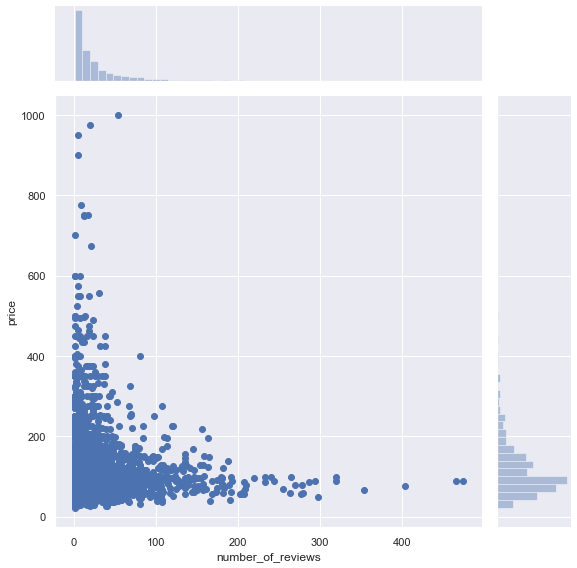

In [9]:
#checking the correlation between price and number of reviews
sb.jointplot(x = airbnbData["number_of_reviews"], y = airbnbData["price"], height = 8) 

In [10]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([airbnbData["price"], airbnbData["beds"]], axis = 1, join_axes = [airbnbData["beds"].index])

# Calculate the correlation between the two columns/variables
jointDF.corr()


price      beds
price  1.000000  0.601586
beds   0.601586  1.000000

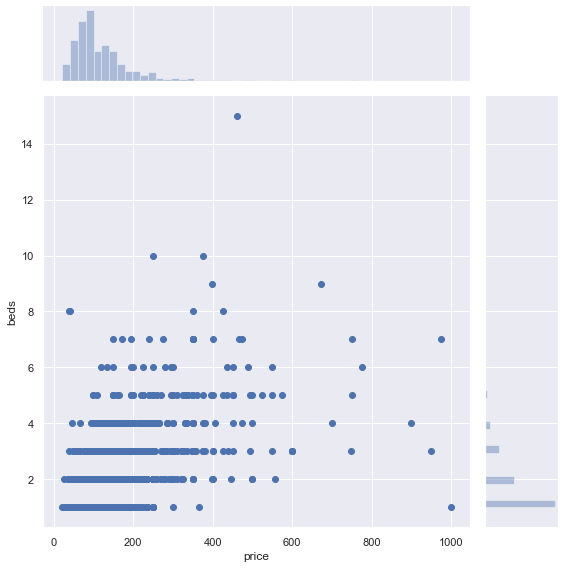

In [11]:
sb.jointplot(x = airbnbData["price"], y = airbnbData["beds"], height = 8)

In [12]:
print(airbnbData['amenities'])

0       {TV,"Cable TV",Internet,"Wireless Internet","A...
1       {TV,Internet,"Wireless Internet",Kitchen,"Free...
2       {TV,"Cable TV",Internet,"Wireless Internet","A...
3       {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4       {"Wireless Internet","Free Parking on Premises...
                              ...                        
2836    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
2837    {TV,"Cable TV",Internet,"Wireless Internet","A...
2838    {Internet,"Wireless Internet",Kitchen,"Free Pa...
2839    {TV,"Cable TV",Internet,"Wireless Internet","A...
2840    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, Length: 2841, dtype: object


In [13]:
airbnbData['host_response_rate']=airbnbData['host_response_rate'].str.replace('%','') #cleaning up of host_response_rate to convert to float 64
airbnbData['host_response_rate']=airbnbData['host_response_rate'].str.replace(',','')
airbnbData['host_response_rate']=airbnbData['host_response_rate'].astype('float64')

<B>Our regression of the price with bathrooms, bedrooms, accomodates and the encoded ameneties variable</B>

In [14]:
airbnbNumData = pd.DataFrame(airbnbData[['price','accommodates','bedrooms','beds','bathrooms']]) #checking of correlation of each columns with price
airbnbNumData.corr()

price  accommodates  bedrooms      beds  bathrooms
price         1.000000      0.667733  0.633774  0.601586   0.513768
accommodates  0.667733      1.000000  0.768002  0.863937   0.514216
bedrooms      0.633774      0.768002  1.000000  0.749326   0.594399
beds          0.601586      0.863937  0.749326  1.000000   0.515221
bathrooms     0.513768      0.514216  0.594399  0.515221   1.000000

In [15]:
airbnbNumData.describe()

price  accommodates     bedrooms         beds    bathrooms
count  2841.000000   2841.000000  2841.000000  2841.000000  2841.000000
mean    123.710313      3.395635     1.286519     1.748680     1.256248
std      87.202263      1.999587     0.862108     1.158033     0.593970
min      22.000000      1.000000     0.000000     1.000000     0.000000
25%      72.000000      2.000000     1.000000     1.000000     1.000000
50%     100.000000      3.000000     1.000000     1.000000     1.000000
75%     149.000000      4.000000     2.000000     2.000000     1.000000
max     999.000000     16.000000     7.000000    15.000000     8.000000

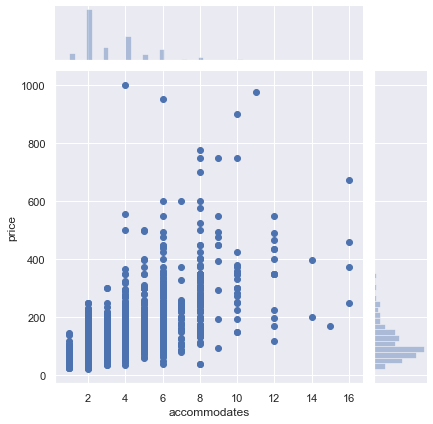

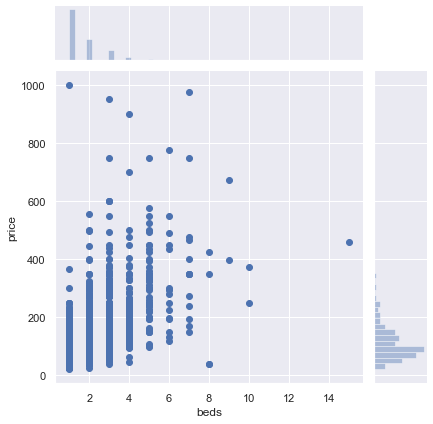

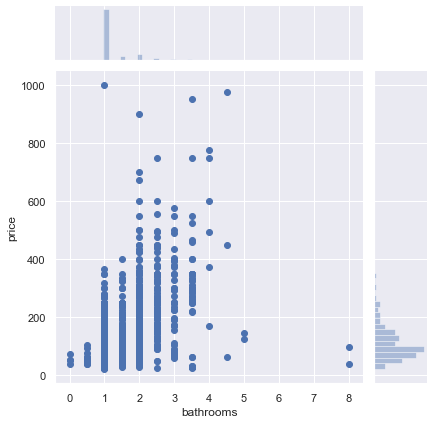

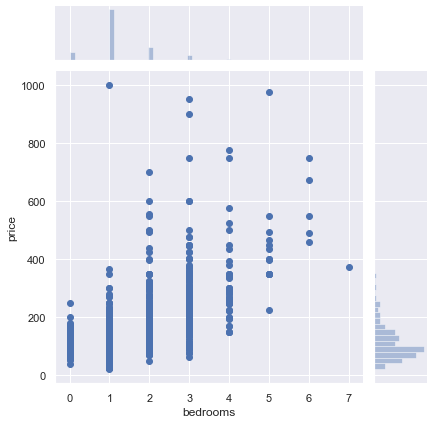

In [16]:
sb.jointplot(airbnbData['accommodates'],airbnbData['price']) #extra jointplots to check for correlations
sb.jointplot(airbnbData['beds'],airbnbData['price'])
sb.jointplot(airbnbData['bathrooms'],airbnbData['price'])
sb.jointplot(airbnbData['bedrooms'],airbnbData['price'])

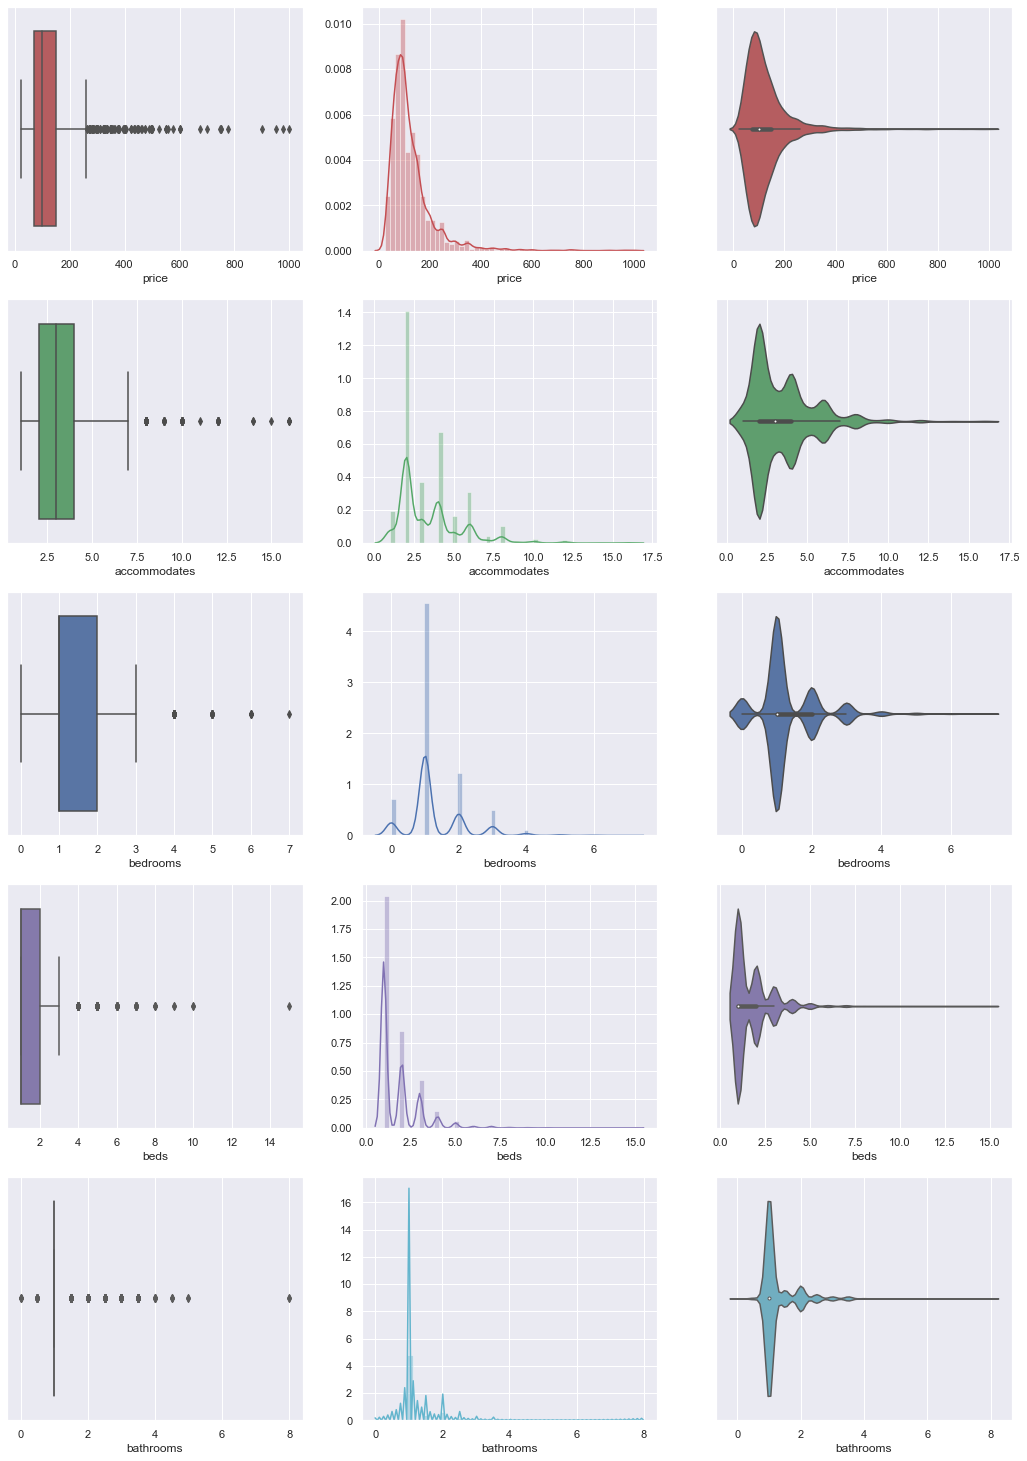

In [17]:
f, axes = plt.subplots(5, 3, figsize=(18, 26))
colors = ["r", "g", "b", "m", "c"]

count = 0
#simple plots to check what kind of distributions they have
for var in airbnbNumData:
    sb.boxplot(airbnbNumData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(airbnbNumData[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(airbnbNumData[var], color = colors[count], ax = axes[count,2])
    count += 1

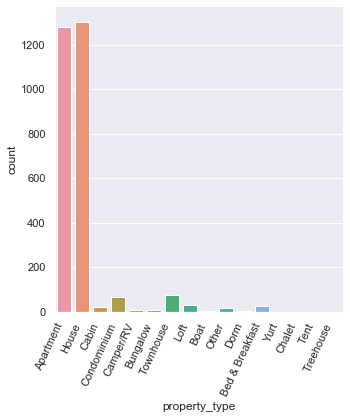

In [18]:
chart = sb.catplot(x='property_type', data=airbnbData ,kind="count",) #analysis of types of housing on airbnb
chart.set_xticklabels(rotation=65, horizontalalignment='right')

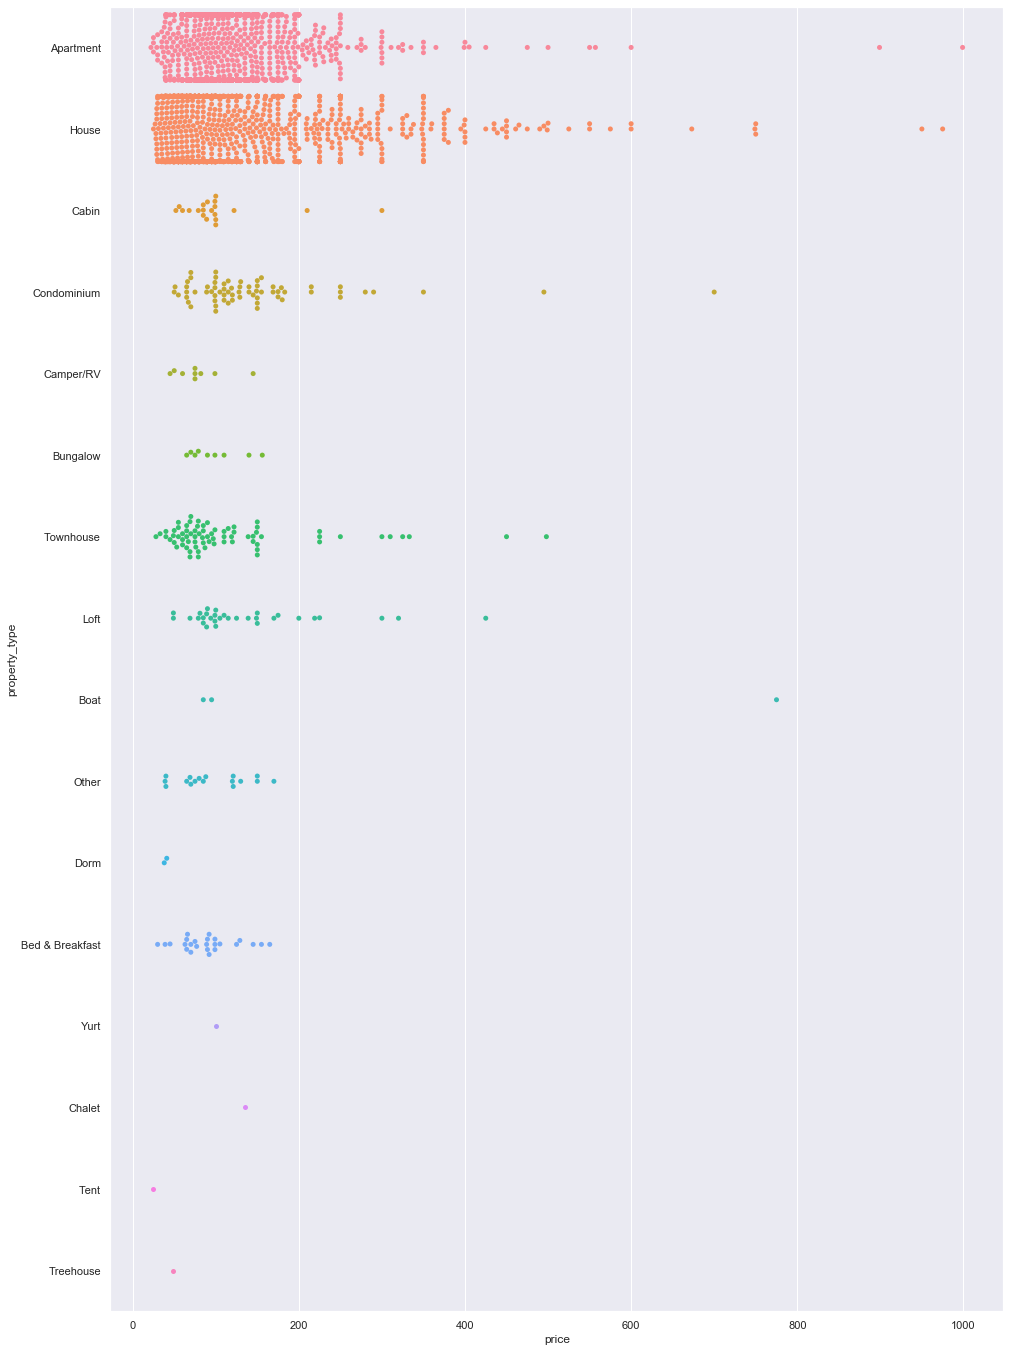

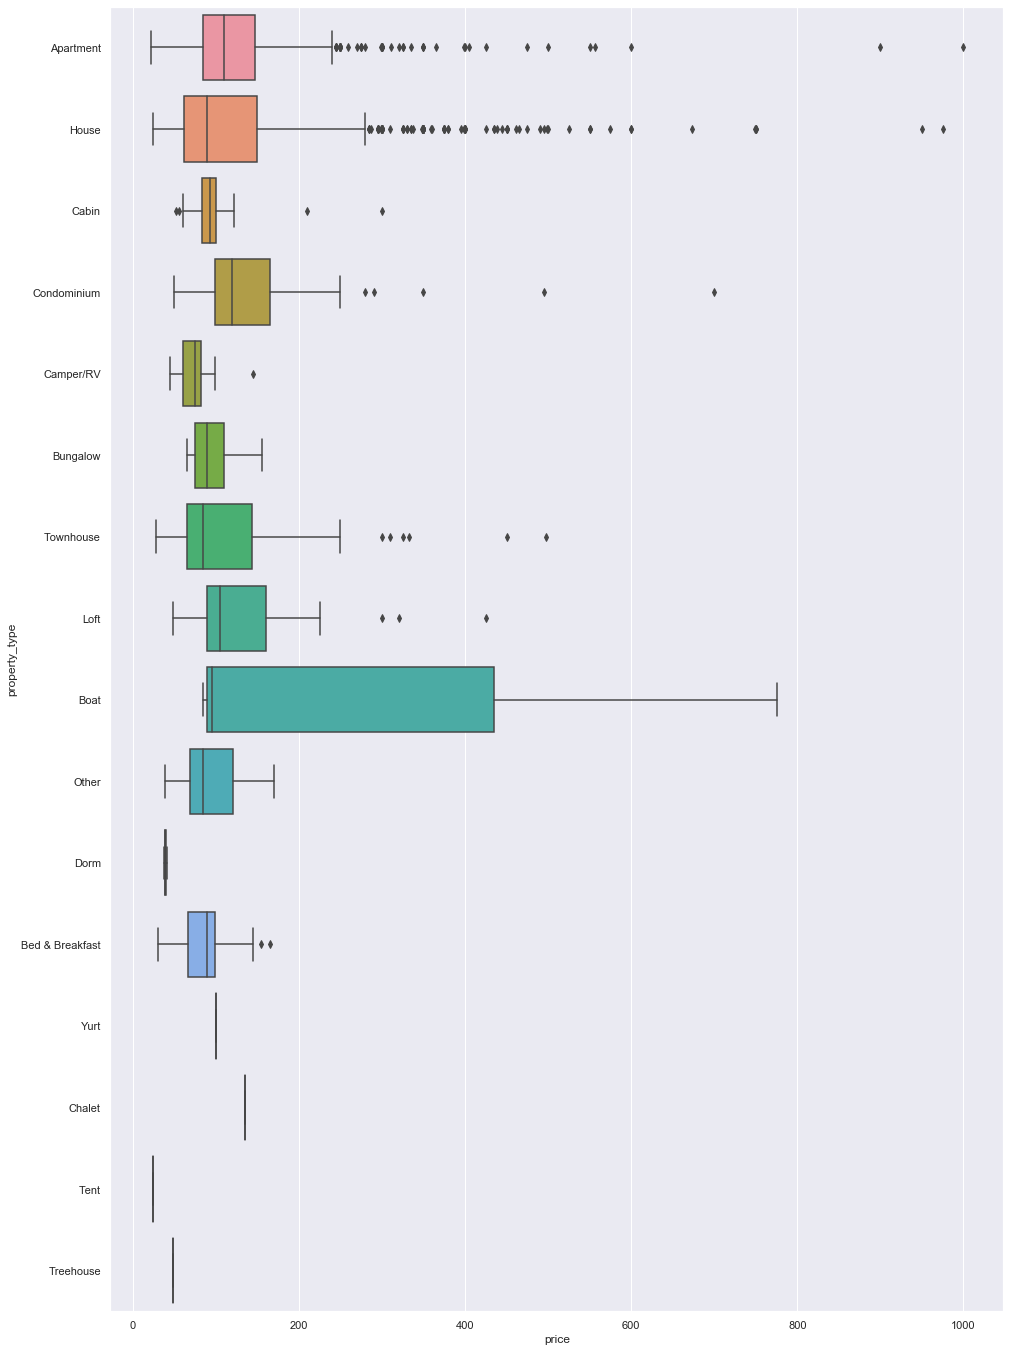

In [19]:
f, axes = plt.subplots(1, 1, figsize=(16, 24))      # quick plot to find the price distribution among various house types
sb.swarmplot(x='price', y='property_type', data=airbnbData)
f, axes = plt.subplots(1, 1, figsize=(16, 24))

sb.boxplot(x='price', y='property_type', data=airbnbData)

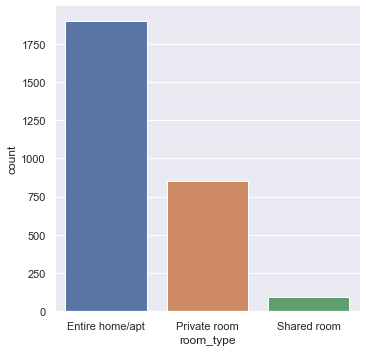

In [20]:
sb.catplot(x='room_type', data=airbnbData ,kind="count") #count of type of listings on airbnb

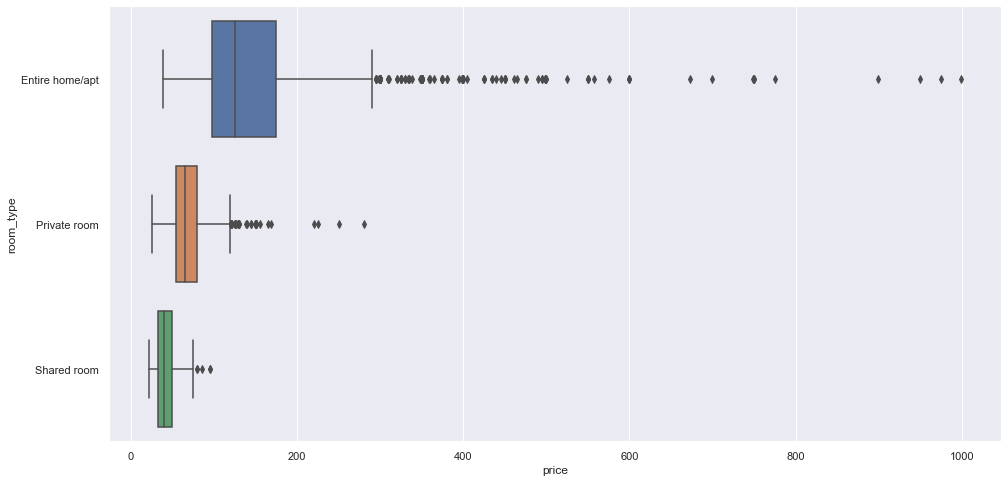

In [21]:
f, axes = plt.subplots(1, 1, figsize=(16, 8)) #boxplot of each listing type with price 
sb.boxplot(y='room_type', x='price', data=airbnbData)

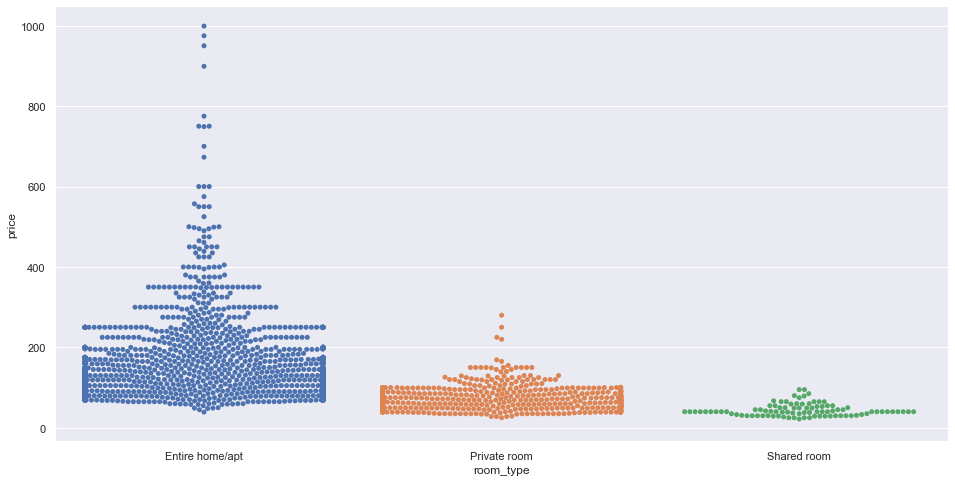

In [22]:
f, axes = plt.subplots(1, 1, figsize=(16, 8)) #swarmplot of each listing type with price 
sb.swarmplot(x='room_type', y='price', data=airbnbData)

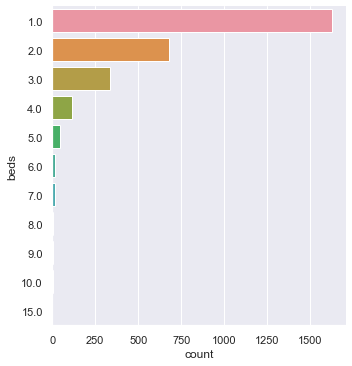

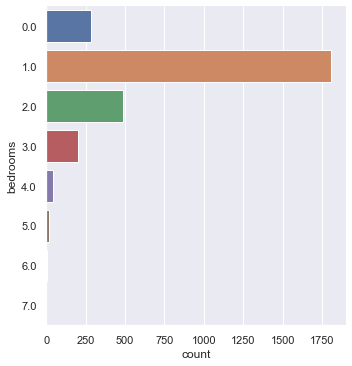

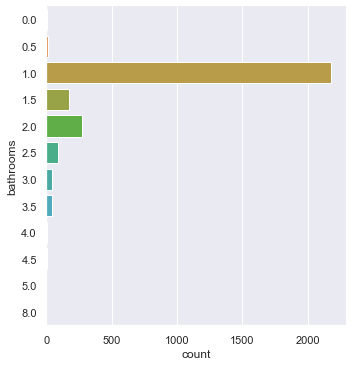

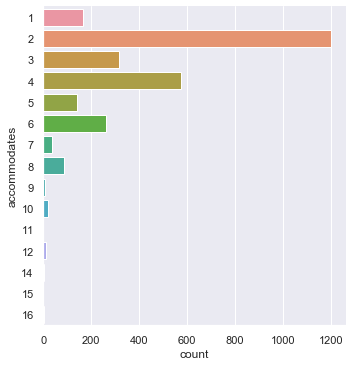

In [23]:
  # countplot of predictors
sb.catplot(y='beds', data=airbnbData ,kind="count")  
sb.catplot(y='bedrooms', data=airbnbData ,kind="count")
sb.catplot(y='bathrooms', data=airbnbData ,kind="count")
sb.catplot(y='accommodates', data=airbnbData ,kind="count")

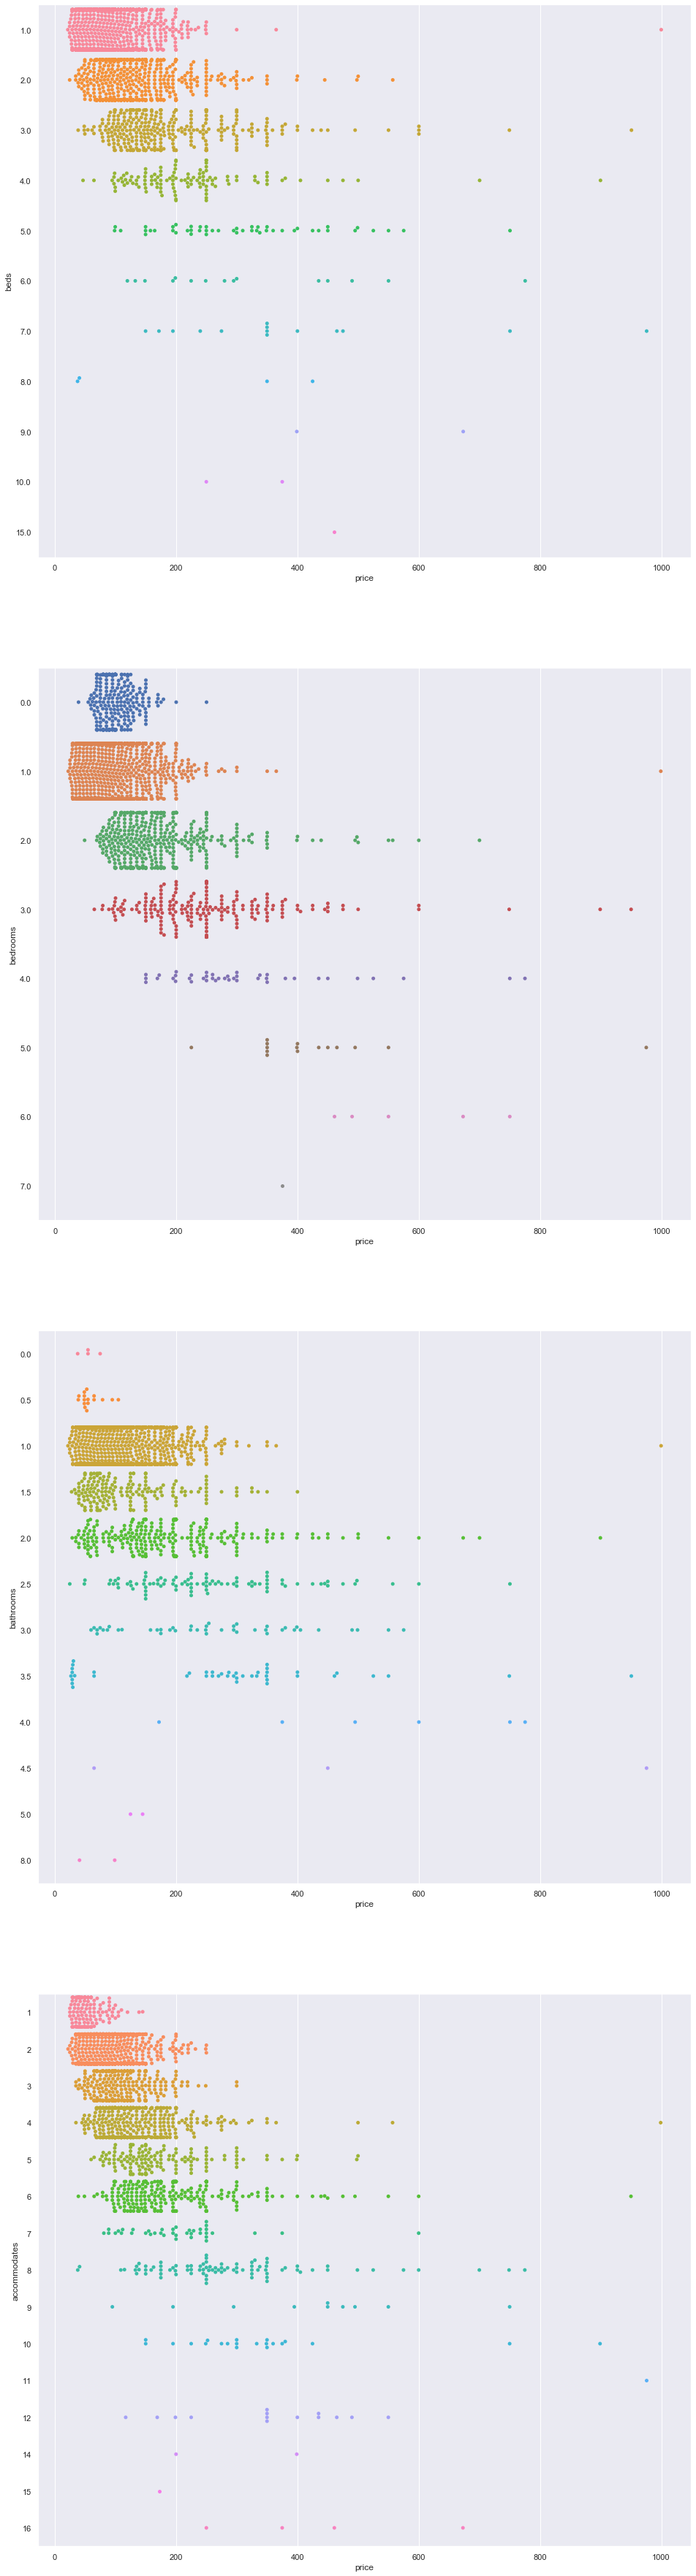

In [24]:
# a swarmplot of the various predictors and price
airbnbData['beds']=airbnbData['beds'].astype('category')  
airbnbData['bedrooms']=airbnbData['bedrooms'].astype('category')
airbnbData['bathrooms']=airbnbData['bathrooms'].astype('category')
airbnbData['accommodates']=airbnbData['accommodates'].astype('category')

f, axes = plt.subplots(4, 1, figsize=(16, 64))
sb.swarmplot(x='price', y='beds', data=airbnbData, ax = axes[0])
sb.swarmplot(x='price', y='bedrooms', data=airbnbData, ax = axes[1])
sb.swarmplot(x='price', y='bathrooms', data=airbnbData, ax = axes[2])
sb.swarmplot(x='price', y='accommodates', data=airbnbData, ax = axes[3])

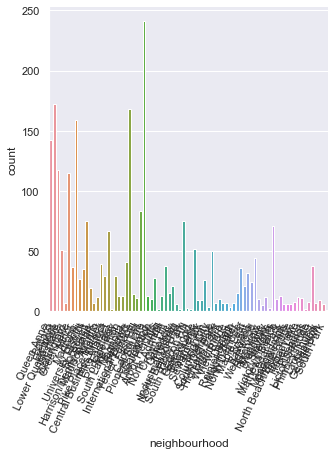

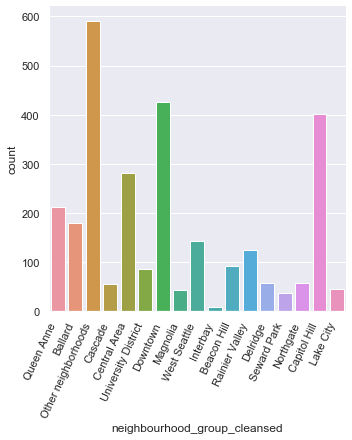

In [25]:
 #a count plot of number of listings in each neighbourhood
chartz=sb.catplot(x='neighbourhood', data=airbnbData ,kind="count")
chartz.set_xticklabels(rotation=65, horizontalalignment='right')

# cleaner distributions of neighbourhoods
chart2 = sb.catplot(x='neighbourhood_group_cleansed', data=airbnbData ,kind="count")
chart2.set_xticklabels(rotation=65, horizontalalignment='right')

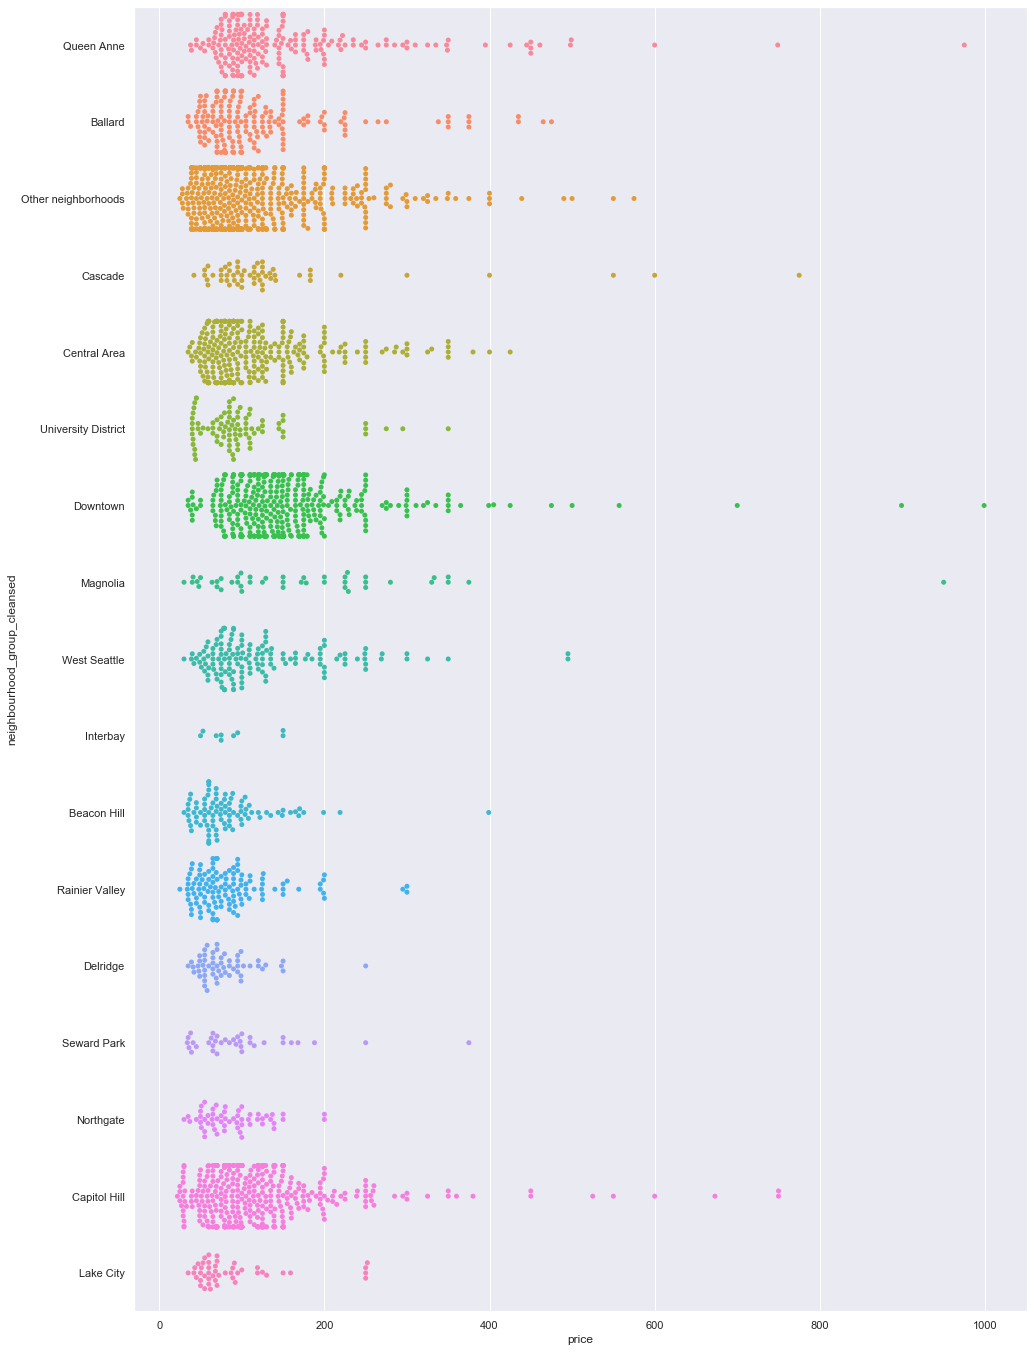

In [26]:
f, axes = plt.subplots(1, 1, figsize=(16, 24)) #swarmplot of neighourhood listings
sb.swarmplot(x='price', y='neighbourhood_group_cleansed', data=airbnbData)

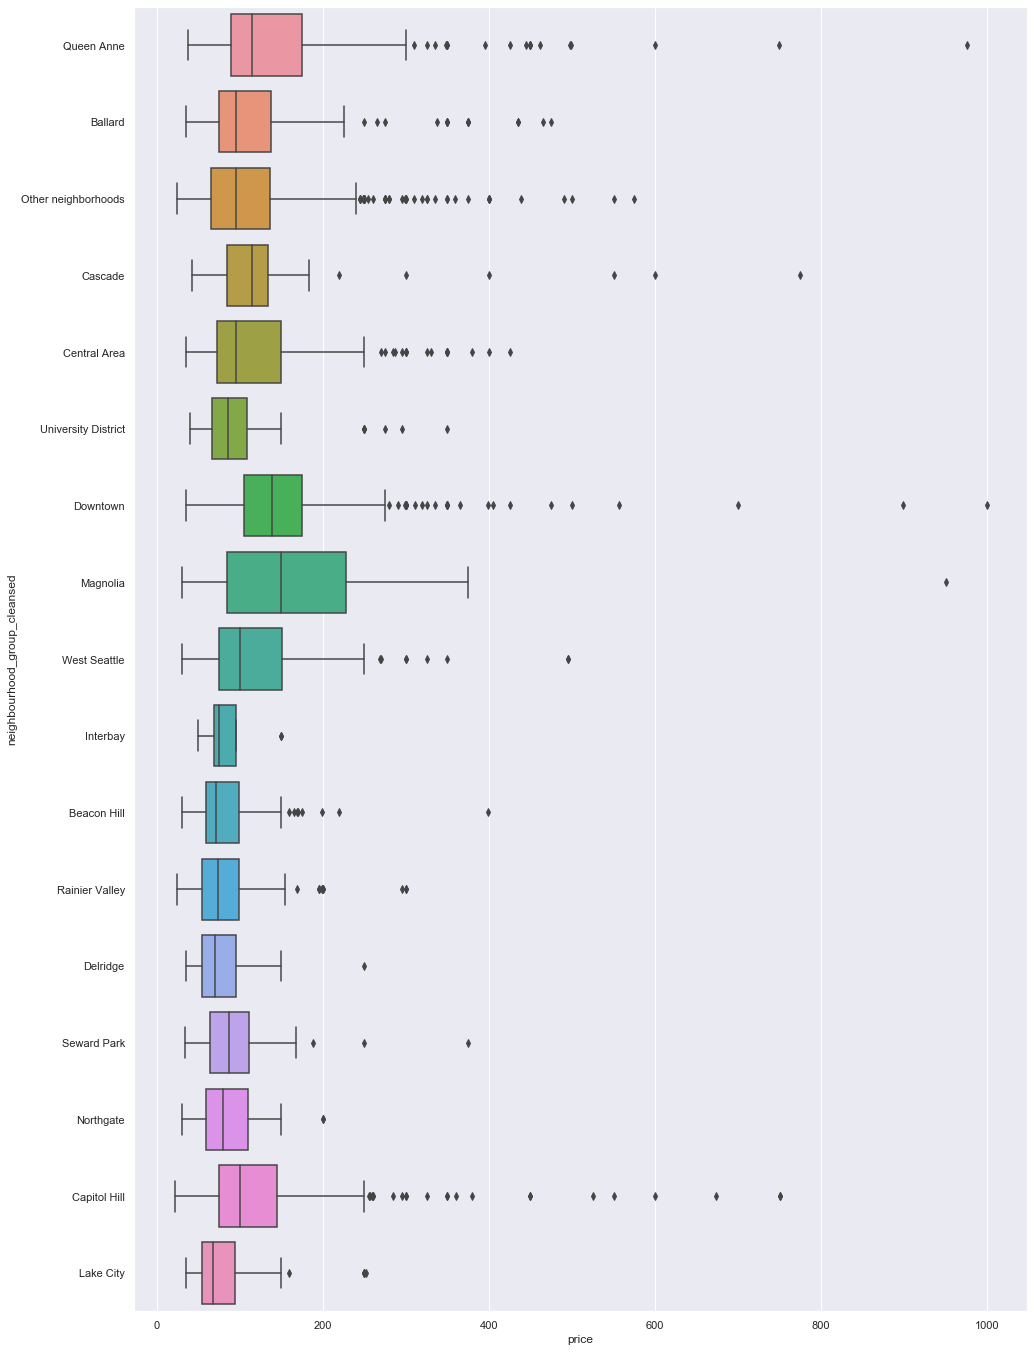

In [27]:
f, axes = plt.subplots(1, 1, figsize=(16, 24)) #boxplot of price in each neighbourhood 
sb.boxplot(x='price', y='neighbourhood_group_cleansed', data=airbnbData)

#### Amenities encoding

In [28]:
airbnbData['amenities'] #prelimnary check of amenities

0       {TV,"Cable TV",Internet,"Wireless Internet","A...
1       {TV,Internet,"Wireless Internet",Kitchen,"Free...
2       {TV,"Cable TV",Internet,"Wireless Internet","A...
3       {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4       {"Wireless Internet","Free Parking on Premises...
                              ...                        
2836    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
2837    {TV,"Cable TV",Internet,"Wireless Internet","A...
2838    {Internet,"Wireless Internet",Kitchen,"Free Pa...
2839    {TV,"Cable TV",Internet,"Wireless Internet","A...
2840    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, Length: 2841, dtype: object

In [29]:
airbnbData['amenitiesList'] = airbnbData['amenities'] # create new column amenitiesList
count = airbnbData['amenities'].count()
test = []
amenitieslist = []
for x in range(0,count):                  # converts amenity string into list of individual elements
    test = airbnbData['amenities'][x]   
    test = test.replace('{','')
    test = test.replace('}','')
    test = test.replace('"','')
    test = test.split(',')
    airbnbData['amenitiesList'][x] = test
    amenitieslist = amenitieslist + test  # creates a single long list of every amenity ever listed (for counting)
print("Length of list amenitieslist is:")
print(len(amenitieslist))
print()
print(amenitieslist)

Length of list amenitieslist is:
41589

['TV', 'Cable TV', 'Internet', 'Wireless Internet', 'Air Conditioning', 'Kitchen', 'Heating', 'Family/Kid Friendly', 'Washer', 'Dryer', 'TV', 'Internet', 'Wireless Internet', 'Kitchen', 'Free Parking on Premises', 'Buzzer/Wireless Intercom', 'Heating', 'Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector', 'Carbon Monoxide Detector', 'First Aid Kit', 'Safety Card', 'Fire Extinguisher', 'Essentials', 'TV', 'Cable TV', 'Internet', 'Wireless Internet', 'Air Conditioning', 'Kitchen', 'Free Parking on Premises', 'Pets Allowed', 'Pets live on this property', 'Dog(s)', 'Cat(s)', 'Hot Tub', 'Indoor Fireplace', 'Heating', 'Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector', 'Carbon Monoxide Detector', 'Essentials', 'Shampoo', 'TV', 'Cable TV', 'Internet', 'Wireless Internet', 'Kitchen', 'Heating', 'Family/Kid Friendly', 'Smoke Detector', 'Carbon Monoxide Detector', 'First Aid Kit', 'Fire Extinguisher', 'Essentials', 'Shampoo', 'Wireless Intern

#### airbnbData['amenitiesList'] is now a list

In [30]:
print(airbnbData['amenitiesList'])

0       [TV, Cable TV, Internet, Wireless Internet, Ai...
1       [TV, Internet, Wireless Internet, Kitchen, Fre...
2       [TV, Cable TV, Internet, Wireless Internet, Ai...
3       [TV, Cable TV, Internet, Wireless Internet, Ki...
4       [Wireless Internet, Free Parking on Premises, ...
                              ...                        
2836    [TV, Cable TV, Internet, Wireless Internet, Ki...
2837    [TV, Cable TV, Internet, Wireless Internet, Ai...
2838    [Internet, Wireless Internet, Kitchen, Free Pa...
2839    [TV, Cable TV, Internet, Wireless Internet, Ai...
2840    [TV, Cable TV, Internet, Wireless Internet, Ki...
Name: amenitiesList, Length: 2841, dtype: object


In [31]:
from collections import Counter     # counts the number of times each amenity appears
cnt = Counter(amenitieslist) 
cntdict = dict(cnt)
cntdict

{'TV': 1931,
 'Cable TV': 1098,
 'Internet': 2142,
 'Wireless Internet': 2766,
 'Air Conditioning': 517,
 'Kitchen': 2565,
 'Heating': 2743,
 'Family/Kid Friendly': 1512,
 'Washer': 2235,
 'Dryer': 2244,
 'Free Parking on Premises': 1644,
 'Buzzer/Wireless Intercom': 410,
 'Smoke Detector': 2498,
 'Carbon Monoxide Detector': 1925,
 'First Aid Kit': 1321,
 'Safety Card': 581,
 'Fire Extinguisher': 1686,
 'Essentials': 2475,
 'Pets Allowed': 356,
 'Pets live on this property': 666,
 'Dog(s)': 379,
 'Cat(s)': 287,
 'Hot Tub': 221,
 'Indoor Fireplace': 648,
 'Shampoo': 2087,
 '24-Hour Check-in': 452,
 'Hangers': 620,
 'Hair Dryer': 591,
 'Iron': 569,
 'Laptop Friendly Workspace': 535,
 'Suitable for Events': 168,
 'Breakfast': 224,
 'Elevator in Building': 576,
 'Wheelchair Accessible': 232,
 'Gym': 320,
 '': 21,
 'Lock on Bedroom Door': 52,
 'Pool': 133,
 'Other pet(s)': 37,
 'Smoking Allowed': 56,
 'Doorman': 65,
 'Washer / Dryer': 1}

In [32]:
dictkeys = list(cntdict.keys())

In [33]:
dictvalues = list(cntdict.values())

In [34]:
data = {'Amenities': dictkeys, 
        'Count': dictvalues} 
amenitiesData = pd.DataFrame(data)   # creates new dataset of amenity properties
amenitiesData = amenitiesData.sort_values(by='Count',ascending=False)
amenitiesData = amenitiesData.reset_index(drop=True)
amenitiesData = amenitiesData.drop([40,41,7])      # drops repeated amenities under different names
amenitiesData = amenitiesData.reset_index(drop=True)

In [35]:
points = [5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,1,1,1,1,1]
amenitiesData['Point Value'] = points     # points assignment based on how common amenity is
amenitiesData

Amenities  Count  Point Value
0            Wireless Internet   2766            5
1                      Heating   2743            5
2                      Kitchen   2565            5
3               Smoke Detector   2498            5
4                   Essentials   2475            5
5                        Dryer   2244            5
6                       Washer   2235            5
7                      Shampoo   2087            4
8                           TV   1931            4
9     Carbon Monoxide Detector   1925            4
10           Fire Extinguisher   1686            4
11    Free Parking on Premises   1644            4
12         Family/Kid Friendly   1512            4
13               First Aid Kit   1321            4
14                    Cable TV   1098            4
15  Pets live on this property    666            4
16            Indoor Fireplace    648            3
17                     Hangers    620            3
18                  Hair Dryer    591            3
19                 Safety Card    581            3
20        Elevator in Building    576            3
21                        Iron    569            3
22   Laptop Friendly Workspace    535            3
23            Air Conditioning    517            3
24            24-Hour Check-in    452            3
25    Buzzer/Wireless Intercom    410            3
26                      Dog(s)    379            3
27                Pets Allowed    356            2
28                         Gym    320            2
29                      Cat(s)    287            2
30       Wheelchair Accessible    232            2
31                   Breakfast    224            2
32                     Hot Tub    221            2
33         Suitable for Events    168            2
34                        Pool    133            1
35                     Doorman     65            1
36             Smoking Allowed     56            1
37        Lock on Bedroom Door     52            1
38                Other pet(s)     37            1

In [36]:
airbnbData['amenitiesList'][0]

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer']

In [37]:
airbnbData['amenitiesScore'] = 0  # creates new column for amenity score for each listing
airbnbData['amenitiesScore']

0       0
1       0
2       0
3       0
4       0
       ..
2836    0
2837    0
2838    0
2839    0
2840    0
Name: amenitiesScore, Length: 2841, dtype: int64

#### Take note: code below may take more than a few seconds to run (up to a minute or two, maybe more on slower devices)

In [38]:
airbnbData['amenitiesScore'] = 0
amenityCount=amenitiesData['Amenities'].count()

for x in range(0,amenityCount):        # assigns amenity score to each listing by adding up individual amenity points
    substr = amenitiesData['Amenities'][x]
    for y in range(0,count):
        if(any(substr == s for s in airbnbData['amenitiesList'][y])):
            airbnbData['amenitiesScore'][y]+=amenitiesData['Point Value'][x]
            
            
        

In [39]:
airbnbData['amenitiesScore']  # total amenity score for each listing

0       40
1       65
2       78
3       53
4       32
        ..
2836    84
2837    60
2838    73
2839    64
2840    64
Name: amenitiesScore, Length: 2841, dtype: int64

In [40]:
airbnbPoints = pd.DataFrame(airbnbData[['price','amenitiesScore']])   #coorelation between price and amenity score
airbnbPoints.corr()

price  amenitiesScore
price           1.000000        0.203646
amenitiesScore  0.203646        1.000000

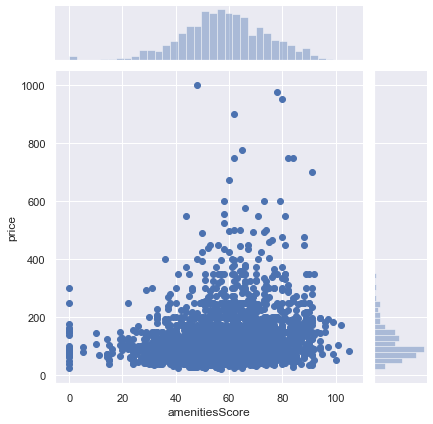

In [41]:
sb.jointplot(airbnbData['amenitiesScore'],airbnbData['price']) # jointplot for amenity score against price

***

# Step 4.1: Predicting the price of an AirBnb listing using Linear Regression <a class="anchor" id="step-four-one"></a>

In [42]:
# convert predictors into int64
airbnbData['beds']=airbnbData['beds'].astype('int64')   
airbnbData['review_scores_rating']=airbnbData['review_scores_rating'].astype('int64')
airbnbData['bathrooms']=airbnbData['bathrooms'].astype('int64')
airbnbData['bedrooms']=airbnbData['bathrooms'].astype('int64')
airbnbData['accommodates']=airbnbData['accommodates'].astype('int64')

In [43]:
predictors = ["accommodates","amenitiesScore","beds","review_scores_rating","bathrooms"]

Intercept of Regression 	: b =  [-60.25556751]
Coefficients of Regression 	: a =  [[22.8546026   0.05218046  4.11399957  0.5862803  33.07403877]]

             Predictors  Coefficients
0          accommodates     22.854603
1        amenitiesScore      0.052180
2                  beds      4.114000
3  review_scores_rating      0.586280
4             bathrooms     33.074039



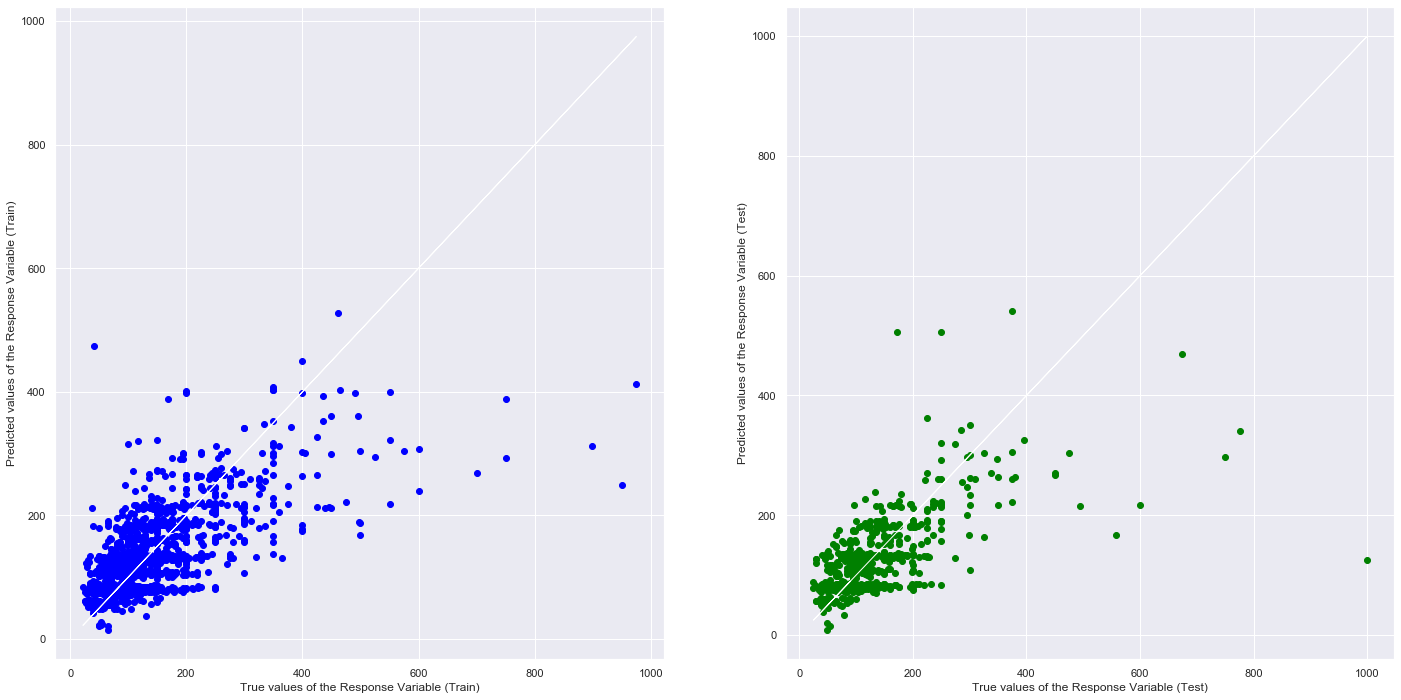

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5005542240386349
Mean Squared Error (MSE) 	: 3697.120036807312
Root of MSE (RMSE) 	: 60.803947542962305

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4382358636345717
Mean Squared Error (MSE) 	: 4603.51491097246
Root of MSE (RMSE) 	: 67.84920715065475



In [44]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Extract Response and Predictors
y = pd.DataFrame(airbnbData["price"])
X = pd.DataFrame(airbnbData[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print('Root of MSE (RMSE) \t:', mean_squared_error(y_train,y_train_pred)**(1/2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print('Root of MSE (RMSE) \t:', mean_squared_error(y_test,y_test_pred)**(1/2))
print()

### Prediction

In [45]:
# extracts random sample of 10 from the dataset
airbnb_pred = airbnbData.sample(n=10)
airbnb_pred

host_response_rate host_is_superhost  host_listings_count  \
2742               100.0                 f                  3.0   
292                 90.0                 f                 37.0   
815                100.0                 f                  1.0   
967                 94.0                 f                 34.0   
2256               100.0                 t                  1.0   
1719               100.0                 f                  3.0   
1928               100.0                 f                  2.0   
2111               100.0                 f                  1.0   
272                100.0                 f                  3.0   
747                 90.0                 t                  2.0   

     host_identity_verified      neighbourhood neighbourhood_cleansed  \
2742                      f            Fremont                Fremont   
292                       t        Wallingford            Wallingford   
815                       t  Pike Place Market            Pike-Market   
967                       t           Belltown               Belltown   
2256                      f            Ballard          Loyal Heights   
1719                      t        Mount Baker            Mount Baker   
1928                      f             Bryant                 Bryant   
2111                      f                NaN               Broadway   
272                       t        Wallingford            Wallingford   
747                       t            Madrona                 Leschi   

     neighbourhood_group_cleansed   latitude   longitude property_type  ...  \
2742          Other neighborhoods  47.649234 -122.346060     Apartment  ...   
292           Other neighborhoods  47.650942 -122.332589         House  ...   
815                      Downtown  47.610560 -122.341296     Apartment  ...   
967                      Downtown  47.613772 -122.347586     Apartment  ...   
2256                      Ballard  47.680881 -122.382225         House  ...   
1719               Rainier Valley  47.589007 -122.297433         House  ...   
1928          Other neighborhoods  47.663059 -122.289448     Apartment  ...   
2111                 Capitol Hill  47.614569 -122.327236     Apartment  ...   
272           Other neighborhoods  47.655129 -122.335288         House  ...   
747                  Central Area  47.607782 -122.289284     Apartment  ...   

     review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
2742                   88                     8.0                        8.0   
292                    84                     7.0                        8.0   
815                    60                    10.0                        8.0   
967                   100                    10.0                       10.0   
2256                   97                     9.0                       10.0   
1719                  100                    10.0                       10.0   
1928                   80                     9.0                       10.0   
2111                  100                    10.0                       10.0   
272                    97                    10.0                       10.0   
747                    98                    10.0                       10.0   

      review_scores_checkin  review_scores_communication  \
2742                    9.0                         10.0   
292                     9.0                          9.0   
815                     6.0                          8.0   
967                    10.0                         10.0   
2256                   10.0                         10.0   
1719                   10.0                         10.0   
1928                    9.0                          7.0   
2111                   10.0                         10.0   
272                    10.0                         10.0   
747                     9.0                         10.0   

     review_scores_location review_scores_value  rev

In [46]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(airbnb_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred

array([[ 76.84336601],
       [ 51.74800312],
       [ 60.27097609],
       [135.84133344],
       [ 82.485152  ],
       [ 83.56564688],
       [123.07211807],
       [ 83.46128596],
       [155.73694446],
       [ 80.61895051]])

In [47]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["PredPrice"], index = airbnb_pred.index)
airbnb_acc = pd.concat([airbnb_pred["price"], y_pred], axis = 1)

y_errs = 100 * abs(airbnb_acc["price"] - airbnb_acc["PredPrice"]) / airbnb_acc["price"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = airbnb_pred.index)
airbnb_acc = pd.concat([airbnb_acc, y_errs], axis = 1)

airbnb_acc

price   PredPrice      Error
2742   43.0   76.843366  78.705502
292    40.0   51.748003  29.370008
815   149.0   60.270976  59.549680
967   150.0  135.841333   9.439111
2256   99.0   82.485152  16.681665
1719   49.0   83.565647  70.542136
1928   80.0  123.072118  53.840148
2111   69.0   83.461286  20.958385
272   150.0  155.736944   3.824630
747   109.0   80.618951  26.037660

In [48]:
MSE_train = mean_squared_error(y_train, y_train_pred)     # find MSE, RMSE, and SE
StdE_pred = np.sqrt(len(y_train) * MSE_train/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Root Mean Squared Error (RMSE) \t:", MSE_train.round(2)**(1/2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))


Mean Squared Error (MSE) 	: 3697.12
Root Mean Squared Error (RMSE) 	: 60.80394724029025
Pred Standard Error (SE) 	: 60.83


In [49]:
y_95l = pd.DataFrame(airbnb_acc["PredPrice"] - 1.96*StdE_pred).rename(columns = {"PredPrice" : "95 Lower"})
y_95u = pd.DataFrame(airbnb_acc["PredPrice"] + 1.96*StdE_pred).rename(columns = {"PredPrice" : "95 Upper"})
y_99l = pd.DataFrame(airbnb_acc["PredPrice"] - 2.58*StdE_pred).rename(columns = {"PredPrice" : "99 Lower"})
y_99u = pd.DataFrame(airbnb_acc["PredPrice"] + 2.58*StdE_pred).rename(columns = {"PredPrice" : "99 Upper"})

airbnb_int = pd.concat([airbnb_acc, y_95l, y_95u, y_99l, y_99u], axis = 1)
airbnb_int

price   PredPrice      Error   95 Lower    95 Upper    99 Lower  \
2742   43.0   76.843366  78.705502 -42.388362  196.075094  -80.104520   
292    40.0   51.748003  29.370008 -67.483725  170.979731 -105.199883   
815   149.0   60.270976  59.549680 -58.960752  179.502704  -96.676910   
967   150.0  135.841333   9.439111  16.609606  255.073061  -21.106553   
2256   99.0   82.485152  16.681665 -36.746576  201.716880  -74.462734   
1719   49.0   83.565647  70.542136 -35.666081  202.797375  -73.382240   
1928   80.0  123.072118  53.840148   3.840390  242.303846  -33.875768   
2111   69.0   83.461286  20.958385 -35.770442  202.693014  -73.486600   
272   150.0  155.736944   3.824630  36.505217  274.968672   -1.210942   
747   109.0   80.618951  26.037660 -38.612777  199.850678  -76.328936   

        99 Upper  
2742  233.791252  
292   208.695890  
815   217.218863  
967   292.789220  
2256  239.433038  
1719  240.513533  
1928  280.020004  
2111  240.409172  
272   312.684831  
747   237.566837

***

# Step 4.2: Predicting the price of an AirBnb listing using other Machine Learning techniques <a class="anchor" id="step-four-two"></a>

In this section, we did other machine learning techniques to predict the price, namely using the K-Nearest Neighbour (KNN), Ridge regression, Random Forest <b>REGRESSION</b>, XGBoost methods and touched on Neural Network. We did this to know which machine learning method will be the best fit to predit the price of an AirBnb listing.

In [50]:
#Extracting all numeric columns in dataset

newTechData=airbnbData._get_numeric_data()


newTechData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841 entries, 0 to 2840
Data columns (total 26 columns):
host_response_rate             2841 non-null float64
host_listings_count            2841 non-null float64
latitude                       2841 non-null float64
longitude                      2841 non-null float64
accommodates                   2841 non-null int64
bathrooms                      2841 non-null int64
bedrooms                       2841 non-null int64
beds                           2841 non-null int64
price                          2841 non-null float64
guests_included                2841 non-null int64
minimum_nights                 2841 non-null int64
maximum_nights                 2841 non-null int64
availability_30                2841 non-null int64
availability_60                2841 non-null int64
availability_90                2841 non-null int64
availability_365               2841 non-null int64
number_of_reviews              2841 non-null int64
review_scores_ra

In [51]:
#drop all the NaN values
newTechData = newTechData.dropna()
newTechData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2834 entries, 0 to 2840
Data columns (total 26 columns):
host_response_rate             2834 non-null float64
host_listings_count            2834 non-null float64
latitude                       2834 non-null float64
longitude                      2834 non-null float64
accommodates                   2834 non-null int64
bathrooms                      2834 non-null int64
bedrooms                       2834 non-null int64
beds                           2834 non-null int64
price                          2834 non-null float64
guests_included                2834 non-null int64
minimum_nights                 2834 non-null int64
maximum_nights                 2834 non-null int64
availability_30                2834 non-null int64
availability_60                2834 non-null int64
availability_90                2834 non-null int64
availability_365               2834 non-null int64
number_of_reviews              2834 non-null int64
review_scores_ra

In [52]:
#drop all the variables that are not needed
newTechDataNP = newTechData

newTechDataNP=newTechDataNP.drop('amenitiesScore',axis=1)
newTechDataNP=newTechDataNP.drop('review_scores_value',axis=1)
newTechDataNP=newTechDataNP.drop('review_scores_accuracy',axis=1)
newTechDataNP=newTechDataNP.drop('review_scores_cleanliness',axis=1)
newTechDataNP=newTechDataNP.drop('review_scores_checkin',axis=1)
newTechDataNP=newTechDataNP.drop('review_scores_communication',axis=1)
newTechDataNP=newTechDataNP.drop('review_scores_location',axis=1)
newTechDataNP=newTechDataNP.drop('availability_60',axis=1)
newTechDataNP=newTechDataNP.drop('availability_30',axis=1)
newTechDataNP=newTechDataNP.drop('availability_365',axis=1)
newTechDataNP=newTechDataNP.drop('host_response_rate',axis=1)
newTechDataNP=newTechDataNP.drop('latitude',axis=1)
newTechDataNP=newTechDataNP.drop('longitude',axis=1)
newTechDataNP=newTechDataNP.drop('beds',axis=1)
newTechDataNP=newTechDataNP.drop('bedrooms',axis=1)
newTechDataNP=newTechDataNP.drop('guests_included',axis=1)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2834 entries, 0 to 2840
Data columns (total 10 columns):
host_listings_count     2834 non-null float64
accommodates            2834 non-null int64
bathrooms               2834 non-null int64
price                   2834 non-null float64
minimum_nights          2834 non-null int64
maximum_nights          2834 non-null int64
availability_90         2834 non-null int64
number_of_reviews       2834 non-null int64
review_scores_rating    2834 non-null int64
reviews_per_month       2834 non-null float64
dtypes: float64(3), int64(7)
memory usage: 243.5 KB


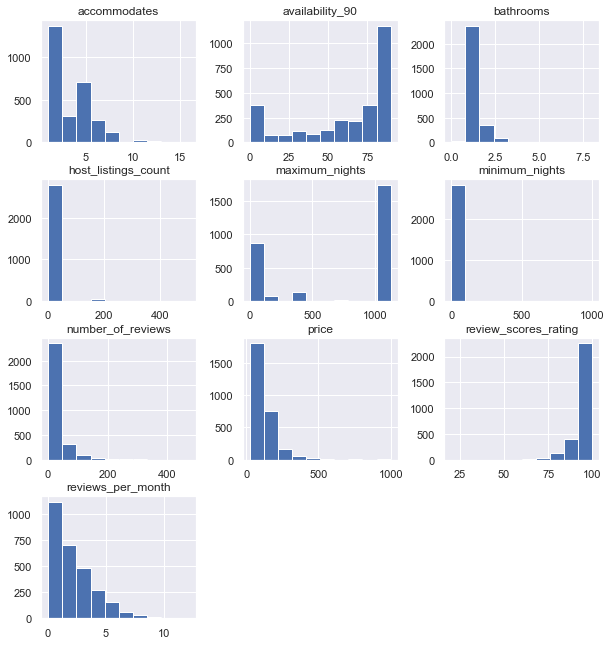

In [53]:
newTechDataNP.info()
newTechDataNP.hist(figsize=(10,11));

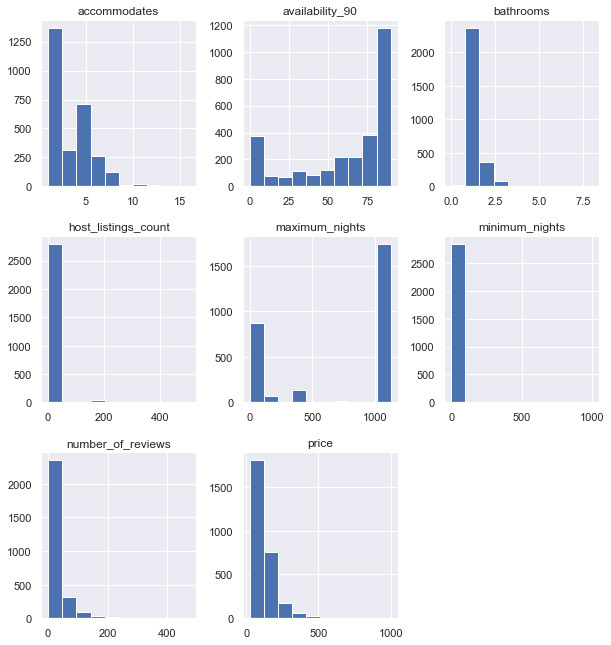

In [54]:
numerical_columns = ['accommodates', 'availability_90', 'bathrooms', 'host_listings_count', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price']
newTechDataNP[numerical_columns].hist(figsize=(10,11));

#### Log transform the values in the columns to have a normal curve, so that the techniques will be accurate:
(Note: I did not do model tuning for my dataset as we agreed upon to use only numerical data for our other regression techniques and hence we do not need the best hyperparameters)

In [55]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_90']] # Removing item(s) not to be transformed

for col in numerical_columns:
    newTechDataNP[col] = newTechDataNP[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    newTechDataNP[col] = np.log(newTechDataNP[col])

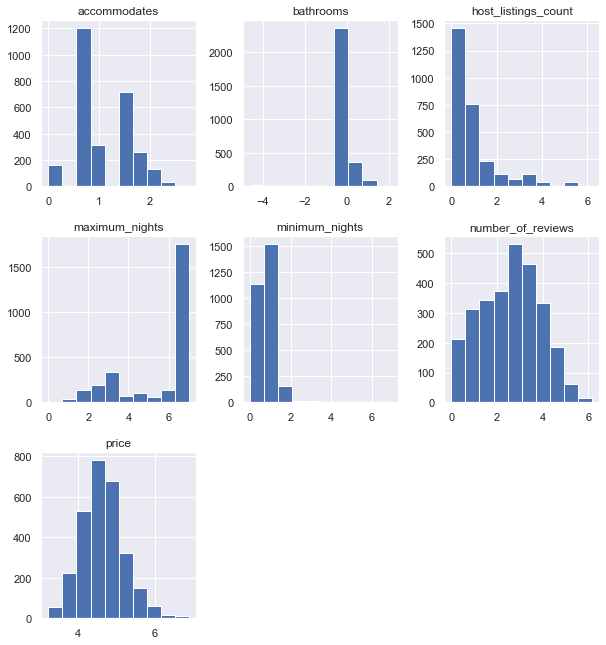

In [56]:
newTechDataNP[numerical_columns].hist(figsize=(10,11));

## K-Nearest Neighbour (KNN):

In [57]:
xknn = newTechDataNP.drop('price', axis=1)
yknn = newTechDataNP.price

#for xknn, i dropped the price row so that the ML wont be biased as it will compare price against price

#### KNN using neighbours = random

In [58]:
xknn_train,xknn_test,yknn_train,yknn_test=train_test_split(xknn,yknn,test_size=0.25)

model = KNeighborsRegressor()
model.fit(xknn_train, yknn_train)
yknn_pred = model.predict(xknn_test)
yknn_pred_train = model.predict(xknn_train)
print('Mean Squared Error for test : ', mean_squared_error(yknn_test,yknn_pred)) #y test against x test
print('Root of MSE (RMSE) for test : ', mean_squared_error(yknn_test,yknn_pred)**(1/2))
print('R2 Score for test : ', r2_score(yknn_test,yknn_pred))
print('\n')
print('Mean Squared Error for train : ', mean_squared_error(yknn_train,yknn_pred_train)) #y test against x test
print('Root of MSE (RMSE) for train : ', mean_squared_error(yknn_train,yknn_pred_train)**(1/2))
print('R2 Score for train : ', r2_score(yknn_train,yknn_pred_train))



Mean Squared Error for test :  0.2667404296467772
Root of MSE (RMSE) for test :  0.516469195254448
R2 Score for test :  0.1160593188186343


Mean Squared Error for train :  0.17998880354488744
Root of MSE (RMSE) for train :  0.424250873357837
R2 Score for train :  0.41626722353204404


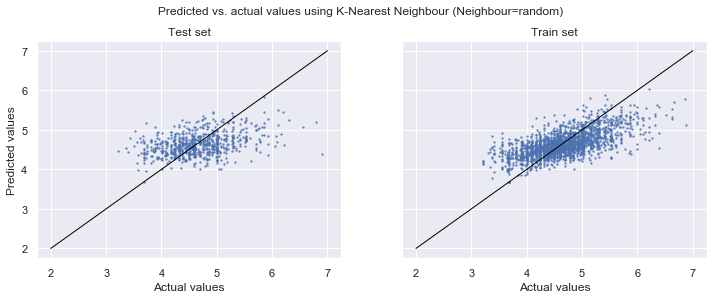

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Predicted vs. actual values using K-Nearest Neighbour (Neighbour=random)', y=1)

ax1.scatter(yknn_test, yknn_pred, s=2, alpha=0.7)
ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linewidth=1)
ax1.set_title('Test set')
ax1.set_xlabel('Actual values')
ax1.set_ylabel('Predicted values')

ax2.scatter(yknn_train, yknn_pred_train, s=2, alpha=0.7)
ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linewidth=1)
ax2.set_title('Train set')
ax2.set_xlabel('Actual values')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')

plt.show()

#### KNN using neighbour distance = 10

In [60]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [61]:
X_train2, X_valid, y_train2, y_valid = train_test_split(xknn_train,yknn_train, test_size=0.25)

model = KNeighborsRegressor(n_neighbors=10, weights='distance')
model.fit(X_train2, y_train2)
y_pred2= model.predict(X_valid)
y_pred2_train = model.predict(X_train2)
print('Mean Squared Error for test: ', mean_squared_error(y_valid,y_pred2))
print('Root of MSE (RMSE) for test : ', mean_squared_error(y_valid,y_pred2)**(1/2))
print('R2 Score for test : ', r2_score(y_valid,y_pred2))

print('\n')
print('Mean Squared Error for train : ', mean_squared_error(y_train2,y_pred2_train)) #y test against x test
print('Root of MSE (RMSE) for train : ', mean_squared_error(y_train2,y_pred2_train)**(1/2))
print('R2 Score for train : ', r2_score(y_train2,y_pred2_train))

Mean Squared Error for test:  0.2845986553341352
Root of MSE (RMSE) for test :  0.5334778864527894
R2 Score for test :  0.15472743119474253


Mean Squared Error for train :  0.00011273539370003732
Root of MSE (RMSE) for train :  0.01061769248471801
R2 Score for train :  0.9996227530055628


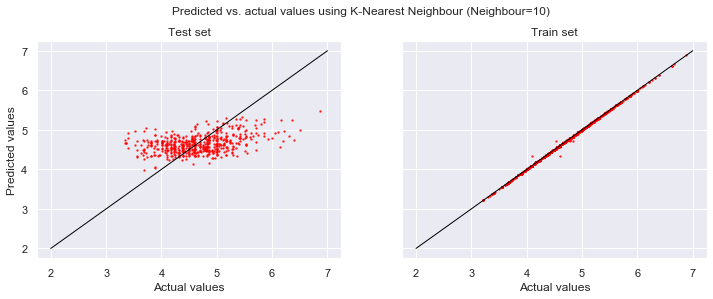

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Predicted vs. actual values using K-Nearest Neighbour (Neighbour=10)', y=1)

ax1.scatter(y_valid, y_pred2, s=2, alpha=0.7,color='red')
ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linewidth=1)
ax1.set_title('Test set')
ax1.set_xlabel('Actual values')
ax1.set_ylabel('Predicted values')

ax2.scatter(y_train2, y_pred2_train, s=2, alpha=0.7,color='red')
ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linewidth=1)
ax2.set_title('Train set')
ax2.set_xlabel('Actual values')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')

plt.show()

#### KNN combining Random neighbour with neighbour distance = 10

In [63]:
X_train3 = np.concatenate([X_train2,X_valid])
y_train3 = np.concatenate([y_train2,y_valid])

In [64]:
model.fit(X_train3,y_train3)
y_pred3 = model.predict(xknn_test)
y_pred3_train = model.predict(xknn_train)
print('Mean Squared Error : ', mean_squared_error(yknn_test,y_pred3))
print('Root of MSE : ', mean_squared_error(yknn_test,y_pred3)**(1/2))
print('R2 Score : ', r2_score(yknn_test,y_pred3))
print('\n')
print('Mean Squared Error : ', mean_squared_error(yknn_train,y_pred3_train))
print('Root of MSE : ', mean_squared_error(yknn_train,y_pred3_train)**(1/2))
print('R2 Score : ', r2_score(yknn_train,y_pred3_train))

Mean Squared Error :  0.25045922087644007
Root of MSE :  0.5004590101860892
R2 Score :  0.17001298002389476


Mean Squared Error :  0.00024007462060671322
Root of MSE :  0.015494341567382372
R2 Score :  0.9992213992088053


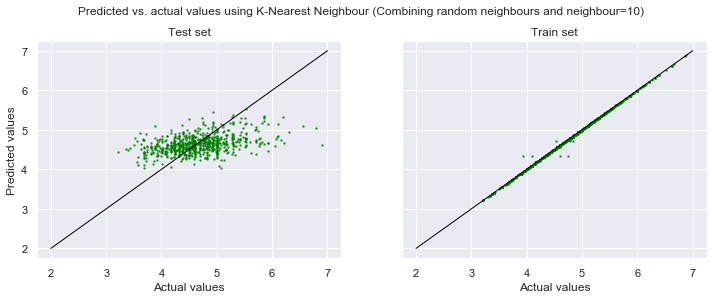

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Predicted vs. actual values using K-Nearest Neighbour (Combining random neighbours and neighbour=10)', y=1)

ax1.scatter(yknn_test, y_pred3, s=2, alpha=0.7,color='green')
ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linewidth=1)
ax1.set_title('Test set')
ax1.set_xlabel('Actual values')
ax1.set_ylabel('Predicted values')

ax2.scatter(yknn_train, y_pred3_train, s=2, alpha=0.7,color='green')
ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linewidth=1)
ax2.set_title('Train set')
ax2.set_xlabel('Actual values')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')

plt.show()

#     

## Random Forest Regressor:

In [66]:
xrf = newTechDataNP.drop('price', axis=1)
yrf = newTechDataNP.price

#same with knn where i dropped the price row to prevent a biased reading

Text(0.5, 1.0, 'N_estimators vs Error')

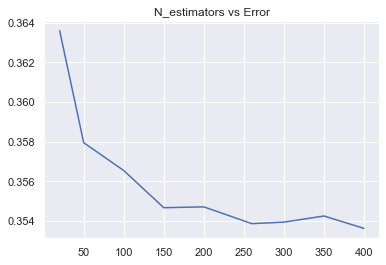

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

Xrf_train,Xrf_test,Yrf_train,Yrf_test=train_test_split(xrf,yrf,test_size=0.25)


N_estimators = [20,50,100,150,200,260,300,350,400]
test_scores = []
for N in N_estimators:
    clf = RandomForestRegressor(n_estimators=N, max_features = 0.3)
    test_score = np.sqrt(-cross_val_score(clf, Xrf_train, Yrf_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(N_estimators,test_scores)
plt.title('N_estimators vs Error')
#to see if the estimators has errors by how much

In [68]:
#building the Random Forest Regressor model
ridge = Ridge(alpha = 78)
rf = RandomForestRegressor()
ridge.fit(Xrf_train,Yrf_train)
rf.fit(Xrf_train,Yrf_train)
Yrf_pred = model.predict(Xrf_test)
Yrf_pred_train = model.predict(Xrf_train)
print('Mean Squared Error for test: ', mean_squared_error(Yrf_test,Yrf_pred))
print('Root of MSE (RMSE) for test: ', mean_squared_error(Yrf_test,Yrf_pred)**(1/2))
print('R2 Score for test: ', r2_score(Yrf_test,Yrf_pred))
print('\n')
print('Mean Squared Error for train: ', mean_squared_error(Yrf_train,Yrf_pred_train))
print('Root of MSE (RMSE) for train: ', mean_squared_error(Yrf_train,Yrf_pred_train)**(1/2))
print('R2 Score for train: ', r2_score(Yrf_train,Yrf_pred_train))


Mean Squared Error for test:  0.06288633706576316
Root of MSE (RMSE) for test:  0.25077148375715125
R2 Score for test:  0.7871922131953792


Mean Squared Error for train:  0.06282321561908667
Root of MSE (RMSE) for train:  0.2506455976455335
R2 Score for train:  0.7976406601010138


In [69]:
# Prediction: log back the y_train 
ridge_predict = ridge.predict(Xrf_test)
rf_predict = rf.predict(Xrf_test)
test_score = rf.score(Xrf_train,Yrf_train)
print(test_score)
y_ridge = np.expm1(ridge_predict)
y_rf = np.expm1(rf_predict)

y=(ridge_predict+rf_predict)/2

0.9192510641927897


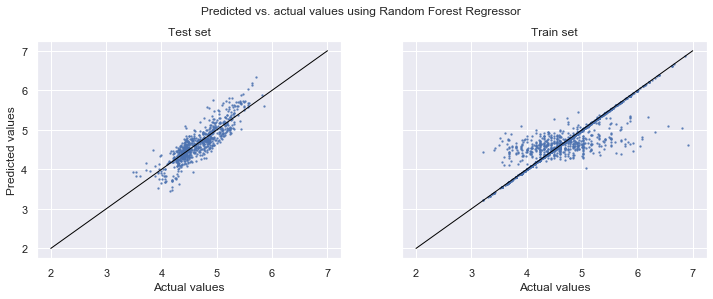

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Predicted vs. actual values using Random Forest Regressor', y=1)

ax1.scatter(ridge_predict, rf_predict, s=2, alpha=0.7)
ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linewidth=1)
ax1.set_title('Test set')
ax1.set_xlabel('Actual values')
ax1.set_ylabel('Predicted values')

ax2.scatter(Yrf_train, Yrf_pred_train, s=2, alpha=0.7)
ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linewidth=1)
ax2.set_title('Train set')
ax2.set_xlabel('Actual values')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')

plt.show()

#      

## Neural Network:

### XGBoost
Before building a neural network, a vanilla XGBoost model will be used to predict price, in order to provide a baseline level of accuracy and a measure of feature importance. This most likely provides the best achievable accuracy using machine learning models (other than possible small accuracy increases from hyper-parameter tuning) due to XGBoost's superior performance.

In [71]:
import xgboost as xgb

In [72]:
xnn = newTechDataNP.drop('price', axis=1)
ynn = newTechDataNP.price

In [73]:
Xnn_train,Xnn_test,Ynn_train,Ynn_test=train_test_split(xnn,ynn,test_size=0.25)

#building the xgboost model
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(Xnn_train, Ynn_train)
training_preds_xgb_reg = xgb_reg.predict(Xnn_train)
val_preds_xgb_reg = xgb_reg.predict(Xnn_test)

print("\nMean Squared Error for train:", mean_squared_error(Ynn_train, training_preds_xgb_reg))
print("Root Mean Squared Error (RMSE) for train:", (mean_squared_error(Ynn_train, training_preds_xgb_reg)**(1/2)))
print("R2 Score for train:", r2_score(Ynn_train, training_preds_xgb_reg))


print('\n')
print("Mean Squared Error for test:", mean_squared_error(Ynn_test, val_preds_xgb_reg))
print("Root Mean Squared Error for test:", (mean_squared_error(Ynn_test, val_preds_xgb_reg)**(1/2)))
print("R2 for test:", r2_score(Ynn_test, val_preds_xgb_reg))

[15:09:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Mean Squared Error for train: 0.09937501684167499
Root Mean Squared Error (RMSE) for train: 0.31523803203559525
R2 Score for train: 0.6772997066949675


Mean Squared Error for test: 0.11562523946769139
Root Mean Squared Error for test: 0.34003711483850024
R2 for test: 0.6184091771785392


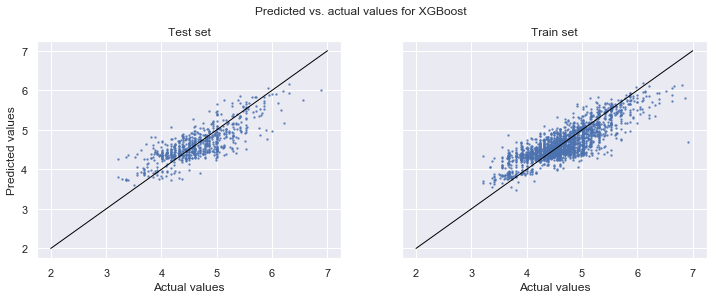

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Predicted vs. actual values for XGBoost', y=1)

ax1.scatter(Ynn_test, val_preds_xgb_reg, s=2, alpha=0.7)
ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linewidth=1)
ax1.set_title('Test set')
ax1.set_xlabel('Actual values')
ax1.set_ylabel('Predicted values')
    
ax2.scatter(Ynn_train, training_preds_xgb_reg, s=2, alpha=0.7)
ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linewidth=1)
ax2.set_title('Train set')
ax2.set_xlabel('Actual values')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')

plt.show()

### Find out which variables are important to predict the price

In [75]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=Xnn_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

weight
availability_90       0.024503
maximum_nights        0.028825
number_of_reviews     0.029985
review_scores_rating  0.032279
reviews_per_month     0.033658
host_listings_count   0.048579
minimum_nights        0.063954
bathrooms             0.130414
accommodates          0.607802

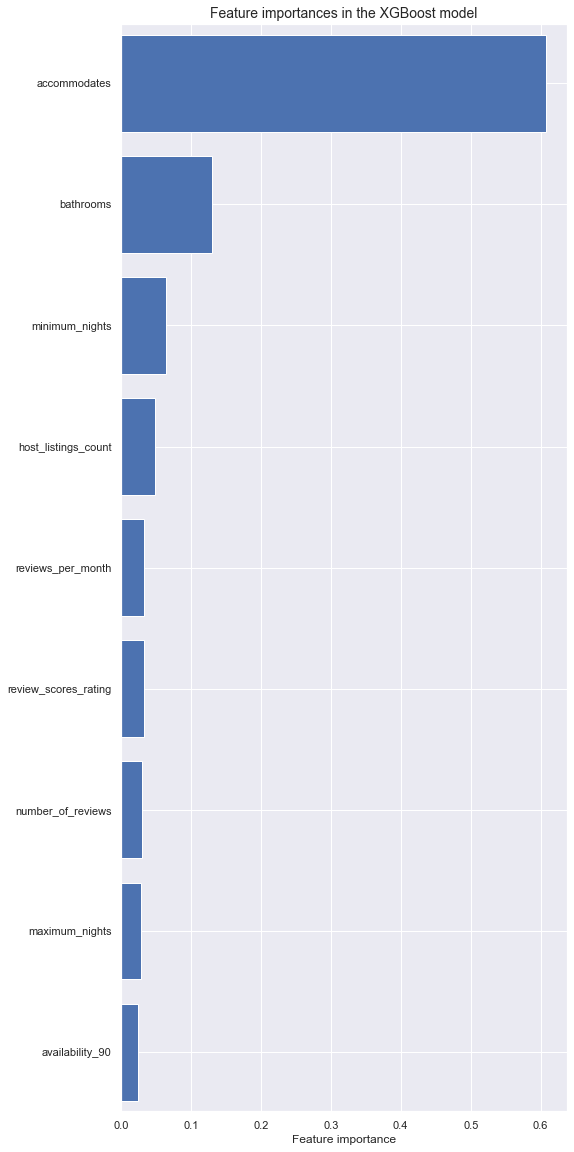

In [76]:
# Plotting the results
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

As seen from above, the top 5 most important feautres are: <br>
<ul>
    <li>How many people the property accommodates</li>
    <li>The nymber of bathrroms in a listing</li>
    <li>The minimum nights stay</li>
    <li>How many other listings the host has</li>
    <li>Number of reviews of the listing per month</li>
</ul>


## Three-layer neural network
It will consist of densely-connected layers, and use an activation function for the hidden layers and a linear activation function for the output layer, as it is being used for a regression task. The loss function will be mean squared error

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 100,353
Trainable params: 100,353
Non-trainable params: 0
_________________________________________________________________
None


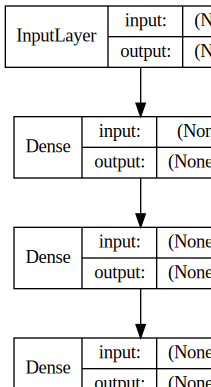

In [77]:
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(Xnn_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2.summary())

# Visualising the neural network
SVG(model_to_dot(nn2, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [78]:
#Training the model

nn2_history = nn2.fit(Xnn_train,
                  Ynn_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

Train on 1912 samples, validate on 213 samples
Epoch 1/100
1912/1912 [==============================] - ETA: 2s - loss: 23.7808 - mean_squared_error: 23.78 - 0s 239us/step - loss: 27.0769 - mean_squared_error: 27.0769 - val_loss: 3.7806 - val_mean_squared_error: 3.7806
Epoch 2/100
1912/1912 [==============================] - ETA: 0s - loss: 3.3873 - mean_squared_error: 3.38 - 0s 19us/step - loss: 6.7223 - mean_squared_error: 6.7223 - val_loss: 7.3998 - val_mean_squared_error: 7.3998
Epoch 3/100
1912/1912 [==============================] - ETA: 0s - loss: 7.0390 - mean_squared_error: 7.03 - 0s 18us/step - loss: 3.1007 - mean_squared_error: 3.1007 - val_loss: 0.7197 - val_mean_squared_error: 0.7197
Epoch 4/100
1912/1912 [==============================] - ETA: 0s - loss: 0.6834 - mean_squared_error: 0.68 - 0s 19us/step - loss: 1.0946 - mean_squared_error: 1.0946 - val_loss: 0.8070 - val_mean_squared_error: 0.8070
Epoch 5/100
1912/1912 [==============================] - ETA: 0s - loss: 0.8

1912/1912 [==============================] - ETA: 0s - loss: 0.1772 - mean_squared_error: 0.17 - 0s 18us/step - loss: 0.1624 - mean_squared_error: 0.1624 - val_loss: 0.1844 - val_mean_squared_error: 0.1844
Epoch 76/100
1912/1912 [==============================] - ETA: 0s - loss: 0.1491 - mean_squared_error: 0.14 - 0s 18us/step - loss: 0.1606 - mean_squared_error: 0.1606 - val_loss: 0.1787 - val_mean_squared_error: 0.1787
Epoch 77/100
1912/1912 [==============================] - ETA: 0s - loss: 0.1741 - mean_squared_error: 0.17 - 0s 18us/step - loss: 0.1676 - mean_squared_error: 0.1676 - val_loss: 0.2128 - val_mean_squared_error: 0.2128
Epoch 78/100
1912/1912 [==============================] - ETA: 0s - loss: 0.1861 - mean_squared_error: 0.18 - 0s 18us/step - loss: 0.1695 - mean_squared_error: 0.1695 - val_loss: 0.1889 - val_mean_squared_error: 0.1889
Epoch 79/100
1912/1912 [==============================] - ETA: 0s - loss: 0.1755 - mean_squared_error: 0.17 - 0s 18us/step - loss: 0.1612

In [79]:
def nn_model_evaluation(model, skip_epochs=0, Xnn_train=Xnn_train, Xnn_test=Xnn_test, Ynn_train=Ynn_train, Ynn_test=Ynn_test):


    # MSE and r squared values
    y_test_pred = model.predict(Xnn_test)
    y_train_pred = model.predict(Xnn_train)
    print("Mean Squared Error for train:", mean_squared_error(Ynn_train, y_train_pred))
    print("Root Mean Squared Error for train:", (mean_squared_error(Ynn_train, y_train_pred))**(1/2))
    print("R2 score for train:", r2_score(Ynn_train, y_train_pred))
    print('\n')
    print("Mean Squared Error for test:", mean_squared_error(Ynn_test, y_test_pred))
    print("Root Mean Squared Error for test:", (mean_squared_error(Ynn_test, y_test_pred))**(1/2))
    print("R2 score for test:", r2_score(Ynn_test, y_test_pred))
    
    # Line graph of losses
    model_results = model.history.history
    plt.plot(list(range((skip_epochs+1),len(model_results['loss'])+1)), model_results['loss'][skip_epochs:], label='Train')
    plt.plot(list(range((skip_epochs+1),len(model_results['val_loss'])+1)), model_results['val_loss'][skip_epochs:], label='Test', color='green')
    plt.legend()
    plt.title('Training and test loss at each epoch') #an epoch refers to one cycle through the full training dataset
    plt.show()
    
    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values for Neural Network', y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    
    ax1.scatter(Ynn_test, y_test_pred, s=2, alpha=0.7)
    ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linewidth=1)
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(Ynn_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linewidth=1)
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()
    
    

Mean Squared Error for train: 0.1563220914319087
Root Mean Squared Error for train: 0.3953758862549772
R2 score for train: 0.4923755853495583


Mean Squared Error for test: 0.156177767041673
Root Mean Squared Error for test: 0.39519332869074725
R2 score for test: 0.4845761798529892


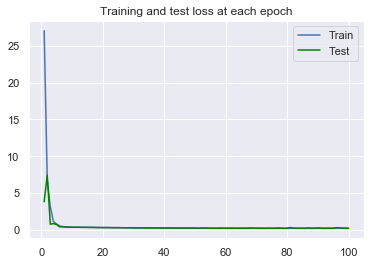

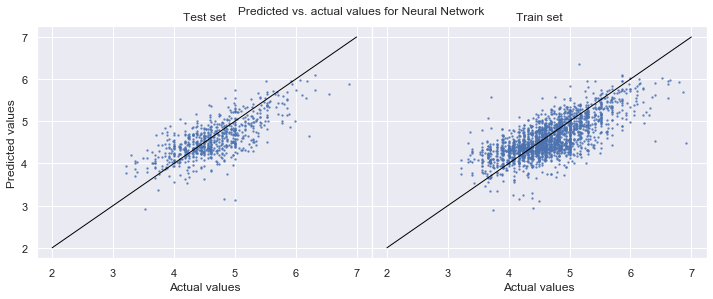

In [80]:
nn_model_evaluation(nn2)

## Results:
As a result, the best Machine Learning method to use will be the Random Forest Regression method as it gives the lowest RMSE values for both the Test and Train data with over/underfitting. This proves that even though Neural Network is claimed to be the <i>'best'</i> Machine Learning method as it is actually a <b>DEEP LEARNING</b> technique, just a simple Random Forest Regression is sufficient to predict the price of an AirBnb listing. However, it was still fun to do all the methods and comparing which was the best one to use.

***

# Step 4.3: Predicting the price of an AirBnb listing using Time Series Analysis <a class="anchor" id="step-four-three"></a>

#### Preparing the dataset

In [81]:
listing=pd.read_csv('calendar.csv',parse_dates=['date'])
#importing the csv file

In [82]:
print("listing_id :", len(listing["listing_id"].unique()))
listing.dtypes
#identifying the data types

listing_id : 3818


listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [83]:
print(listing)

         listing_id       date available   price
0            241032 2016-01-04         t  $85.00
1            241032 2016-01-05         t  $85.00
2            241032 2016-01-06         f     NaN
3            241032 2016-01-07         f     NaN
4            241032 2016-01-08         f     NaN
...             ...        ...       ...     ...
1393565    10208623 2016-12-29         f     NaN
1393566    10208623 2016-12-30         f     NaN
1393567    10208623 2016-12-31         f     NaN
1393568    10208623 2017-01-01         f     NaN
1393569    10208623 2017-01-02         f     NaN

[1393570 rows x 4 columns]


In [84]:
listing=listing.dropna()
#dropping the rows with empty values

In [85]:
print(listing)

         listing_id       date available   price
0            241032 2016-01-04         t  $85.00
1            241032 2016-01-05         t  $85.00
9            241032 2016-01-13         t  $85.00
10           241032 2016-01-14         t  $85.00
14           241032 2016-01-18         t  $85.00
...             ...        ...       ...     ...
1393207    10208623 2016-01-06         t  $87.00
1393208    10208623 2016-01-07         t  $87.00
1393211    10208623 2016-01-10         t  $87.00
1393212    10208623 2016-01-11         t  $87.00
1393213    10208623 2016-01-12         t  $87.00

[934542 rows x 4 columns]


In [86]:
listing['price'] = listing['price'].str.replace('$', '').str.replace(',', '').astype(float)
#change the format to float format

In [87]:
listing.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [88]:
%matplotlib inline

In [89]:
timebank=pd.read_csv('calendar.csv',parse_dates=['date'],index_col=['date'])

In [90]:
timebank=timebank.drop(columns=['listing_id','available'])

In [91]:
timebank['price'] = timebank['price'].str.replace('$', '').str.replace(',', '').astype(float)
#Only include data and price into dataFrame and change the format for price into float numbers

#### Plotting the original time series graph(raw data)

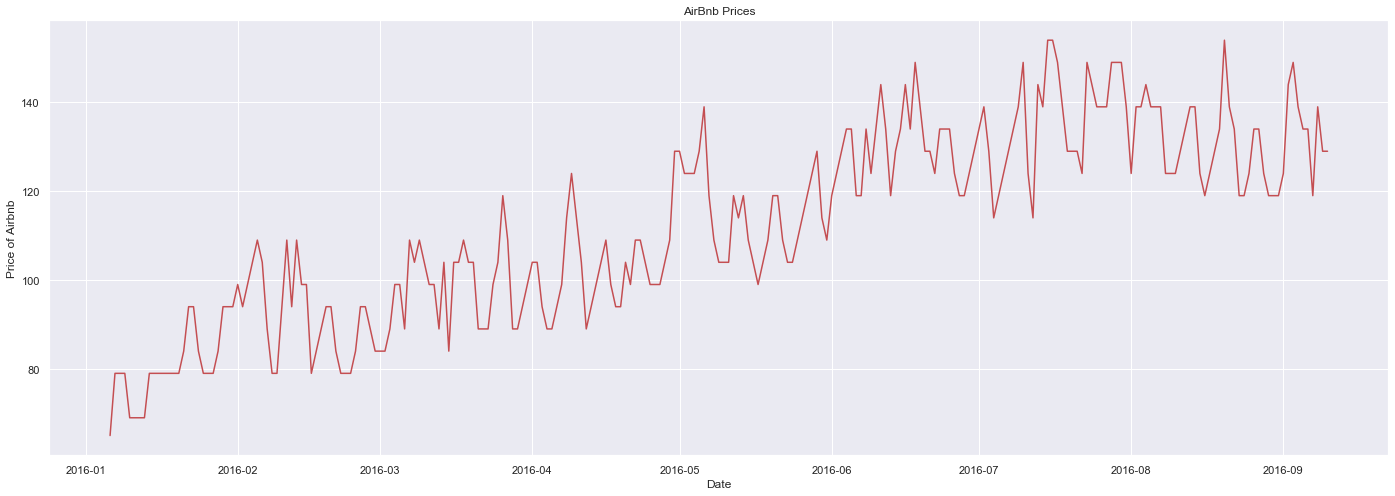

In [92]:
timedrop = pd.DataFrame(timebank).iloc[1023462:1023825].dropna()
plt.figure(figsize=(24, 8))
plt.plot(timedrop,color='r')
plt.title('AirBnb Prices')
plt.xlabel("Date")
plt.ylabel("Price of Airbnb")
plt.grid(True)
#original time series graph

In [93]:
rolmean=timedrop.rolling(window=10).mean()
rolstd=timedrop.rolling(window=10).std()
print(rolmean)
print(rolstd)
#calculate rolling mean and rolling standard deviation

            price
date             
2016-01-06    NaN
2016-01-07    NaN
2016-01-08    NaN
2016-01-09    NaN
2016-01-10    NaN
...           ...
2016-09-06  130.5
2016-09-07  130.0
2016-09-08  132.0
2016-09-09  133.0
2016-09-10  134.0

[249 rows x 1 columns]
                price
date                 
2016-01-06        NaN
2016-01-07        NaN
2016-01-08        NaN
2016-01-09        NaN
2016-01-10        NaN
...               ...
2016-09-06  11.067972
2016-09-07  11.498792
2016-09-08  11.105554
2016-09-09  10.219806
2016-09-10   9.128709

[249 rows x 1 columns]


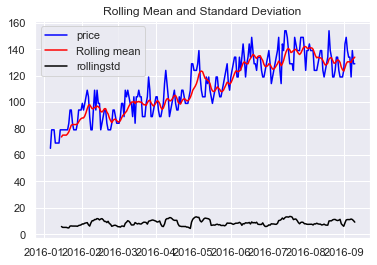

In [94]:
orig=plt.plot(timedrop,color='blue',label='price')
mean=plt.plot(rolmean,color='red',label="Rolling mean")
std=plt.plot(rolstd,color='black',label="rollingstd")
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)
#Include the rolling mean and rolling std into same graph

#### Code for ADCF test

In [95]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest =adfuller(timedrop['price'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4],index=['Test statistic','p-value','#lags Used',"Number of Observations used"])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value

print(dfoutput)
#finding the p value for ADCF test
#The test results show that the p-value is not valid

Results of Dickey-Fuller Test:
Test statistic                  -1.701035
p-value                          0.430579
#lags Used                      15.000000
Number of Observations used    233.000000
Critical Value (1%)             -3.458731
Critical Value (5%)             -2.874026
Critical Value (10%)            -2.573424
dtype: float64


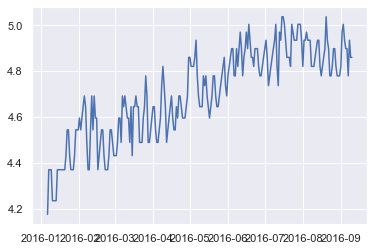

In [96]:
timedrop_logScale=np.log(timedrop)
plt.plot(timedrop_logScale)
#log trasnform the data to check if the rolling mean is then constant

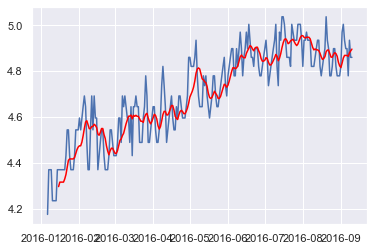

In [97]:
movingAverage=timedrop_logScale.rolling(window=10).mean()
movingSTD=timedrop_logScale.rolling(window=10).std()
plt.plot(timedrop_logScale)
plt.plot(movingAverage,color='red')
#visually you can notice that the rolling mean is not constant

In [98]:
datasetlogscaleminusmovingaverage=timedrop_logScale-movingAverage
datasetlogscaleminusmovingaverage.head(10)

datasetlogscaleminusmovingaverage.dropna(inplace=True)
datasetlogscaleminusmovingaverage.head(10)

price
date                
2016-01-15  0.073643
2016-01-16  0.054137
2016-01-17  0.054137
2016-01-18  0.054137
2016-01-19  0.054137
2016-01-20  0.040602
2016-01-21  0.082300
2016-01-22  0.163859
2016-01-23  0.132941
2016-01-24  0.014326

In [99]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage=timeseries.rolling(window=10).mean()
    movingSTD =timeseries.rolling(window=10).std()
    
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(movingAverage,color='red',label="roling mean")
    std=plt.plot(movingSTD,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)
    
    print("results of Dickey-Fuller Test:")
    dftest=adfuller(timeseries['price'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value',"#Lags Used","Number of observations used"])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    
    print(dfoutput)
    
#the code to print our adcf test    

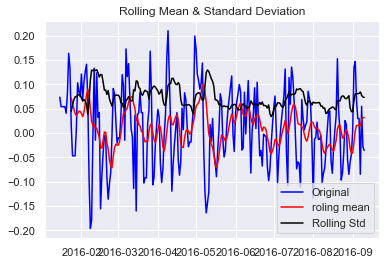

results of Dickey-Fuller Test:
Test Statistic                  -4.840624
p-value                          0.000045
#Lags Used                      15.000000
Number of observations used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


In [100]:
test_stationarity(datasetlogscaleminusmovingaverage)
#try to see if subratacting the moving average provides a more constant rolling mean and a lower p value.
#The p value is low but the moving average is not constant

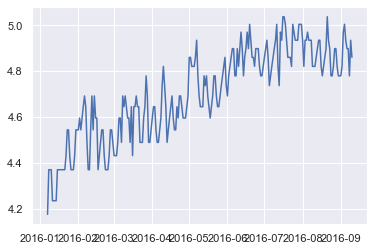

In [101]:
plt.plot(timedrop_logScale.shift())
#creating a lag in the data by 1

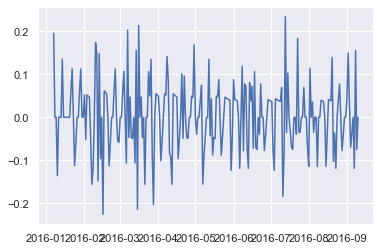

In [102]:
datasetLogDiffShifting=timedrop_logScale-timedrop_logScale.shift()
plt.plot(datasetLogDiffShifting)
#subtracting the data with logscale shift graph

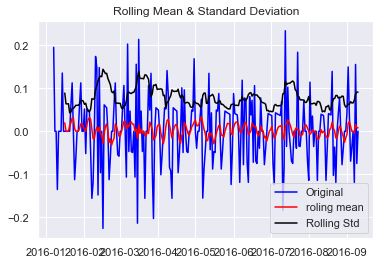

results of Dickey-Fuller Test:
Test Statistic                  -4.198833
p-value                          0.000662
#Lags Used                      14.000000
Number of observations used    233.000000
Critical Value (1%)             -3.458731
Critical Value (5%)             -2.874026
Critical Value (10%)            -2.573424
dtype: float64


In [103]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)
#plotting the rolling mean and standard deviation into the graph

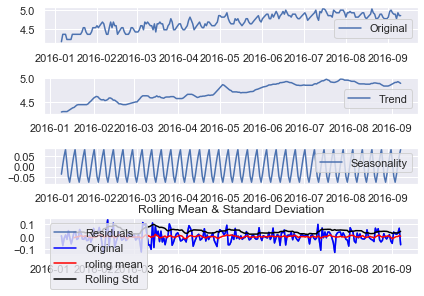

results of Dickey-Fuller Test:
Test Statistic                -7.875276e+00
p-value                        4.862817e-12
#Lags Used                     1.300000e+01
Number of observations used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64


In [104]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(timedrop_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(timedrop_logScale,label="Original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label="Seasonality")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)
#breakdown drawing of the graph

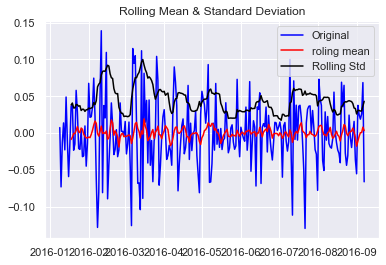

results of Dickey-Fuller Test:
Test Statistic                -7.875276e+00
p-value                        4.862817e-12
#Lags Used                     1.300000e+01
Number of observations used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64


In [105]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

#### Calculating the p and q values by finding out at which line does the graph intercept the line zero

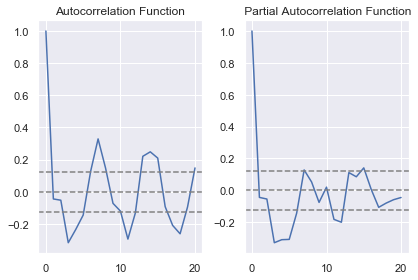

In [106]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(datasetLogDiffShifting,nlags=20)
lag_pacf=pacf(datasetLogDiffShifting,nlags=20,method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title(" Partial Autocorrelation Function")
plt.tight_layout()
#calculating the p and q values by finding out at which line does the graph intercept the line zero

#### Check Residual Sum of Squares

Plotting AR model


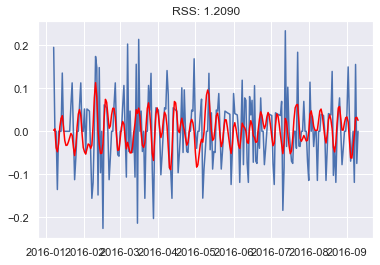

In [107]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(timedrop_logScale,order=(2,1,2))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-datasetLogDiffShifting['price'])**2))
print('Plotting AR model')
#calculating the rss value with p=2,d=1,q=2. The rss value the closer to 1 the better it is, 1.2 is a good result

Plotting AR model


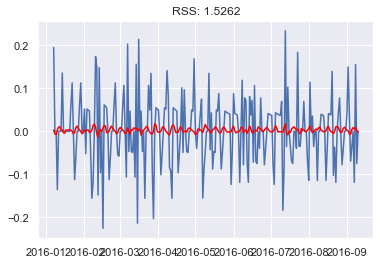

In [108]:
model=ARIMA(timedrop_logScale,order=(2,1,0))
results_MA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['price'])**2))
print('Plotting AR model')
#change the q value to 0, the RSS value shoots up to 1.5 which makes it not suitable

Text(0.5, 1.0, 'RSS: 1.2090')

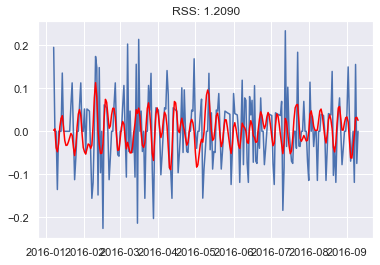

In [109]:
model=ARIMA(timedrop_logScale,order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['price'])**2))
#calculating the rss value to check if it has the best value

In [110]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

date
2016-01-07    0.002559
2016-01-08    0.005514
2016-01-09   -0.038296
2016-01-10   -0.047678
2016-01-11   -0.028712
dtype: float64


In [111]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2016-01-07    0.002559
2016-01-08    0.008073
2016-01-09   -0.030223
2016-01-10   -0.077901
2016-01-11   -0.106613
dtype: float64


In [112]:
predictions_ARIMA_log=pd.Series(timedrop_logScale['price'].ix[0],index=timedrop_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2016-01-06    4.174387
2016-01-07    4.176946
2016-01-08    4.182460
2016-01-09    4.144164
2016-01-10    4.096486
dtype: float64

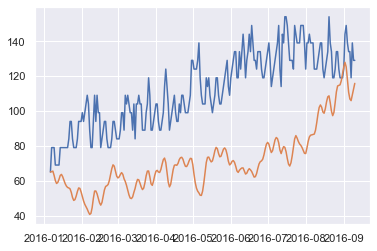

In [113]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(timedrop)
plt.plot(predictions_ARIMA)


In [114]:
print(timedrop_logScale)

               price
date                
2016-01-06  4.174387
2016-01-07  4.369448
2016-01-08  4.369448
2016-01-09  4.369448
2016-01-10  4.234107
...              ...
2016-09-06  4.897840
2016-09-07  4.779123
2016-09-08  4.934474
2016-09-09  4.859812
2016-09-10  4.859812

[249 rows x 1 columns]


#### Plotting the predicted graph for the unit from September to October

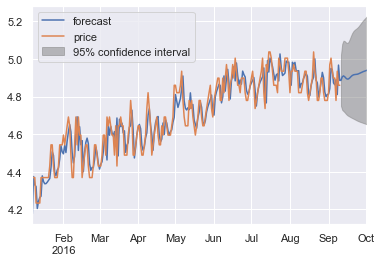

In [115]:
results_ARIMA.plot_predict(1,270)
x=results_ARIMA.forecast(steps=30)
#plotting my prediction together with the original graph

In [116]:
x[1]
#seperating out the values on the predicted dates

array([0.0695527 , 0.08953013, 0.09548672, 0.0965993 , 0.09693581,
       0.09775734, 0.10028406, 0.10490497, 0.11036396, 0.11513973,
       0.11868357, 0.12128941, 0.12349245, 0.12573111, 0.12824544,
       0.13104641, 0.13397015, 0.13681785, 0.13947671, 0.14194669,
       0.14429642, 0.14660529, 0.14892445, 0.15126418, 0.15360381,
       0.15591324, 0.15817172, 0.16037534, 0.16253343, 0.16465979])

In [117]:
len(x[1])

30

In [118]:
results_ARIMA.forecast(steps=60)

(array([4.88611876, 4.90431961, 4.90959138, 4.90499803, 4.8973389 ,
        4.89259491, 4.89331216, 4.89853288, 4.90544483, 4.91136954,
        4.91501281, 4.91662221, 4.91734547, 4.9183705 , 4.9203371 ,
        4.92321301, 4.92653697, 4.92978712, 4.93265393, 4.93511812,
        4.93736171, 4.93961181, 4.94201553, 4.94459585, 4.94728253,
        4.94997767, 4.95261241, 4.95517041, 4.95767799, 4.96017696,
        4.96269914, 4.96525434, 4.96783309, 4.97041773, 4.97299371,
        4.97555563, 4.97810668, 4.98065426, 4.98320493, 4.98576153,
        4.98832308, 4.99088654, 4.99344895, 4.9960089 , 4.99856661,
        5.00112333, 5.00368036, 5.00623841, 5.00879746, 5.011357  ,
        5.01391648, 5.01647554, 5.01903415, 5.02159253, 5.02415091,
        5.02670945, 5.02926818, 5.03182704, 5.0343859 , 5.0369447 ]),
 array([0.0695527 , 0.08953013, 0.09548672, 0.0965993 , 0.09693581,
        0.09775734, 0.10028406, 0.10490497, 0.11036396, 0.11513973,
        0.11868357, 0.12128941, 0.12349245, 0.

In [119]:
x[1]

array([0.0695527 , 0.08953013, 0.09548672, 0.0965993 , 0.09693581,
       0.09775734, 0.10028406, 0.10490497, 0.11036396, 0.11513973,
       0.11868357, 0.12128941, 0.12349245, 0.12573111, 0.12824544,
       0.13104641, 0.13397015, 0.13681785, 0.13947671, 0.14194669,
       0.14429642, 0.14660529, 0.14892445, 0.15126418, 0.15360381,
       0.15591324, 0.15817172, 0.16037534, 0.16253343, 0.16465979])

In [120]:
for val in x[0]:
    print(np.exp(val))
#changing the logged values to a more suitable format

132.4385498694098
134.87111440545556
135.5840001097115
134.9626439580273
133.93289681662642
133.29902506520952
133.39466756813417
134.09290439433525
135.0229587118001
135.82530557595948
136.32105569096177
136.54062827915328
136.63941842753593
136.77954887741518
137.04880471904204
137.44351189545836
137.90112933133503
138.35005698200638
138.7472500759156
139.08957147530077
139.4019809666151
139.7160032501284
140.05224494597317
140.41409061242257
140.79184644561988
141.17181212797485
141.54425278004817
141.90678633886697
142.26307622300402
142.61903222717984


In [121]:
finale = pd.DataFrame(timebank).iloc[1023713:1023743]

In [122]:
finale=finale.drop(columns=['price'])

In [123]:
pricelist=[]
for val in x[0]:
    print(np.exp(val))
    pricelist.append(round(np.exp(val),2))

132.4385498694098
134.87111440545556
135.5840001097115
134.9626439580273
133.93289681662642
133.29902506520952
133.39466756813417
134.09290439433525
135.0229587118001
135.82530557595948
136.32105569096177
136.54062827915328
136.63941842753593
136.77954887741518
137.04880471904204
137.44351189545836
137.90112933133503
138.35005698200638
138.7472500759156
139.08957147530077
139.4019809666151
139.7160032501284
140.05224494597317
140.41409061242257
140.79184644561988
141.17181212797485
141.54425278004817
141.90678633886697
142.26307622300402
142.61903222717984


In [124]:
finale.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2016-09-13 to 2016-10-12
Empty DataFrame

In [125]:
finale['price']=pricelist


#### Printing the prices for the predicted data

In [126]:
print(finale)
#predicted prices for host to use to set the price of the airbnb units to maximise profits

             price
date              
2016-09-13  132.44
2016-09-14  134.87
2016-09-15  135.58
2016-09-16  134.96
2016-09-17  133.93
2016-09-18  133.30
2016-09-19  133.39
2016-09-20  134.09
2016-09-21  135.02
2016-09-22  135.83
2016-09-23  136.32
2016-09-24  136.54
2016-09-25  136.64
2016-09-26  136.78
2016-09-27  137.05
2016-09-28  137.44
2016-09-29  137.90
2016-09-30  138.35
2016-10-01  138.75
2016-10-02  139.09
2016-10-03  139.40
2016-10-04  139.72
2016-10-05  140.05
2016-10-06  140.41
2016-10-07  140.79
2016-10-08  141.17
2016-10-09  141.54
2016-10-10  141.91
2016-10-11  142.26
2016-10-12  142.62


In [127]:
values=x[2].tolist()

In [128]:
len(values)

30

In [129]:
mini=[]
maxi=[]
for num in range(0,30):
    mini.append(round(np.exp(values[num][0]),2))
    maxi.append(round(np.exp(values[num][1]),2))

In [130]:
finale['mini']=mini

In [131]:
finale['maxi']=maxi

#### Printing the prices for the confidence interval and the price

In [132]:
print(finale)
#using the confidence interval to find the minimum and maximum values so that the prices do not exceed the limits

             price    mini    maxi
date                              
2016-09-13  132.44  115.56  151.78
2016-09-14  134.87  113.16  160.74
2016-09-15  135.58  112.44  163.49
2016-09-16  134.96  111.68  163.09
2016-09-17  133.93  110.76  161.96
2016-09-18  133.30  110.06  161.45
2016-09-19  133.39  109.59  162.37
2016-09-20  134.09  109.17  164.70
2016-09-21  135.02  108.76  167.63
2016-09-22  135.83  108.39  170.21
2016-09-23  136.32  108.03  172.02
2016-09-24  136.54  107.65  173.18
2016-09-25  136.64  107.27  174.06
2016-09-26  136.78  106.91  175.00
2016-09-27  137.05  106.59  176.21
2016-09-28  137.44  106.31  177.69
2016-09-29  137.90  106.06  179.31
2016-09-30  138.35  105.81  180.90
2016-10-01  138.75  105.56  182.37
2016-10-02  139.09  105.31  183.70
2016-10-03  139.40  105.06  184.97
2016-10-04  139.72  104.82  186.22
2016-10-05  140.05  104.60  187.52
2016-10-06  140.41  104.39  188.87
2016-10-07  140.79  104.19  190.25
2016-10-08  141.17  104.00  191.63
2016-10-09  141.54  

#### Hence, a Time series graph is effective to predict future prices and serve as a guideline for Airbnb host to set their prices along the prediction to increase their revenue through renting. Time Series is very useful for data that is non linear.

***

# Extra modelling: Predicting a Superhost status <a class="anchor" id="extra"></a>

In the below section, we did an extra modelling technique to predict a superhost status by using Classification. This was meant to be an extra piece because we thought it would be funny to predict someone's superhost status (and also Nazhura was bored during the Circuit Breaker period) :-)

In [133]:
newMainDF = pd.DataFrame(airbnbData)

In [134]:
superhost= newMainDF['host_is_superhost']

In [135]:
superhost

0       f
1       t
2       f
3       f
4       t
       ..
2836    f
2837    f
2838    t
2839    f
2840    f
Name: host_is_superhost, Length: 2841, dtype: object

#### Encoding the superhost status from false and true to numerical values

In [136]:
#t: 1, f:0
superhostE = superhost.replace(('t', 'f'), (1, 0))
print(superhostE)

0       0
1       1
2       0
3       0
4       1
       ..
2836    0
2837    0
2838    1
2839    0
2840    0
Name: host_is_superhost, Length: 2841, dtype: int64


In [137]:
noReviews = newMainDF['number_of_reviews']

In [138]:
noReviews

0       207
1        43
2        20
3        38
4        58
       ... 
2836      5
2837      2
2838     73
2839      1
2840      2
Name: number_of_reviews, Length: 2841, dtype: int64

In [139]:
reviewRating = newMainDF['review_scores_rating']
reviewRating

0        95
1        96
2        97
3        92
4        99
       ... 
2836     92
2837    100
2838     96
2839     80
2840    100
Name: review_scores_rating, Length: 2841, dtype: int64

In [140]:
reviewMonth = newMainDF['reviews_per_month']
reviewMonth.dtypes

dtype('float64')

In [141]:
priceHi = newMainDF['price']
priceHi.describe

<bound method NDFrame.describe of 0        85.0
1       150.0
2       975.0
3       450.0
4        80.0
        ...  
2836    154.0
2837     65.0
2838     95.0
2839    359.0
2840     79.0
Name: price, Length: 2841, dtype: float64>

In [142]:
listCount = newMainDF['host_listings_count']
listCount.describe

<bound method NDFrame.describe of 0         3.0
1         6.0
2         2.0
3         2.0
4         1.0
        ...  
2836      1.0
2837      1.0
2838      3.0
2839    354.0
2840      1.0
Name: host_listings_count, Length: 2841, dtype: float64>

In [143]:
responseRate = newMainDF['host_response_rate']
responseRate.describe

<bound method NDFrame.describe of 0        96.0
1        98.0
2        67.0
3       100.0
4       100.0
        ...  
2836    100.0
2837    100.0
2838    100.0
2839     99.0
2840    100.0
Name: host_response_rate, Length: 2841, dtype: float64>

#### Uni-variate classification for each aforemoentioned variables

In [144]:
def p2(r):
    # Import essential models and functions from sklearn
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    from sklearn.tree import export_graphviz
    import graphviz

    res =  pd.DataFrame(newMainDF[r])
    predict = pd.DataFrame(superhostE)


    X_train, X_test, y_train, y_test = train_test_split(res, predict,test_size=0.33)
   
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
    dectree.fit(X_train, y_train)                    # train the decision tree model

    # Predict Legendary values corresponding to Total
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print()

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
                annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
                annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [145]:
import graphviz


#### Classification for reviews per month:

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7514450867052023

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7366737739872068



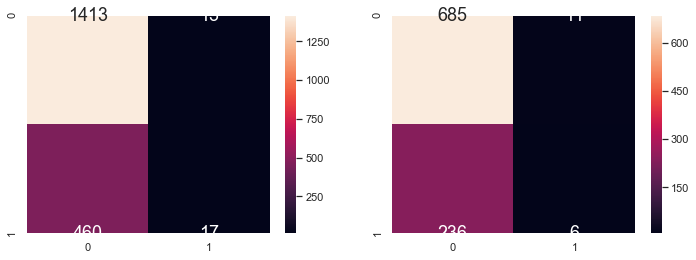

In [146]:
p2('reviews_per_month')

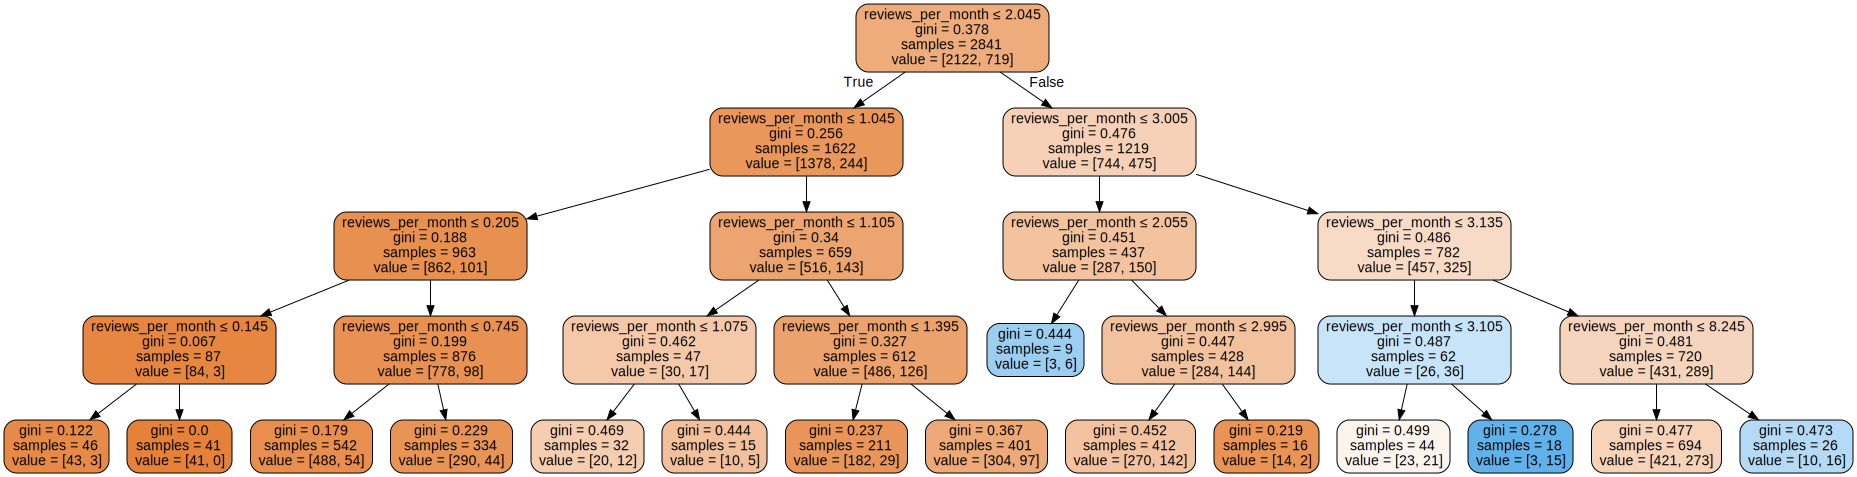

In [147]:
dectree = DecisionTreeClassifier(max_depth=4)

reviewMonth_train = pd.DataFrame(newMainDF['reviews_per_month'])
superhost_train = pd.DataFrame(superhostE)
dectree.fit(reviewMonth_train, superhost_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = reviewMonth_train.columns,         # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript


graphviz.Source(treedot)

#### Classification for number of reviews:

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.744613767735155

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7515991471215352



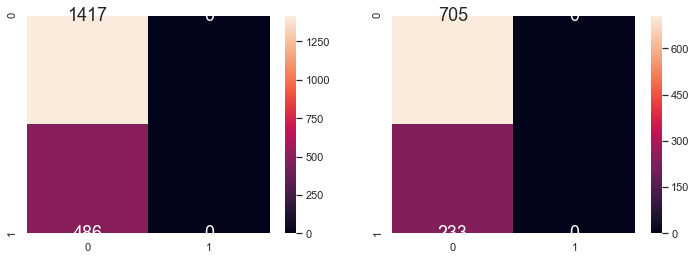

In [148]:
p2('number_of_reviews')

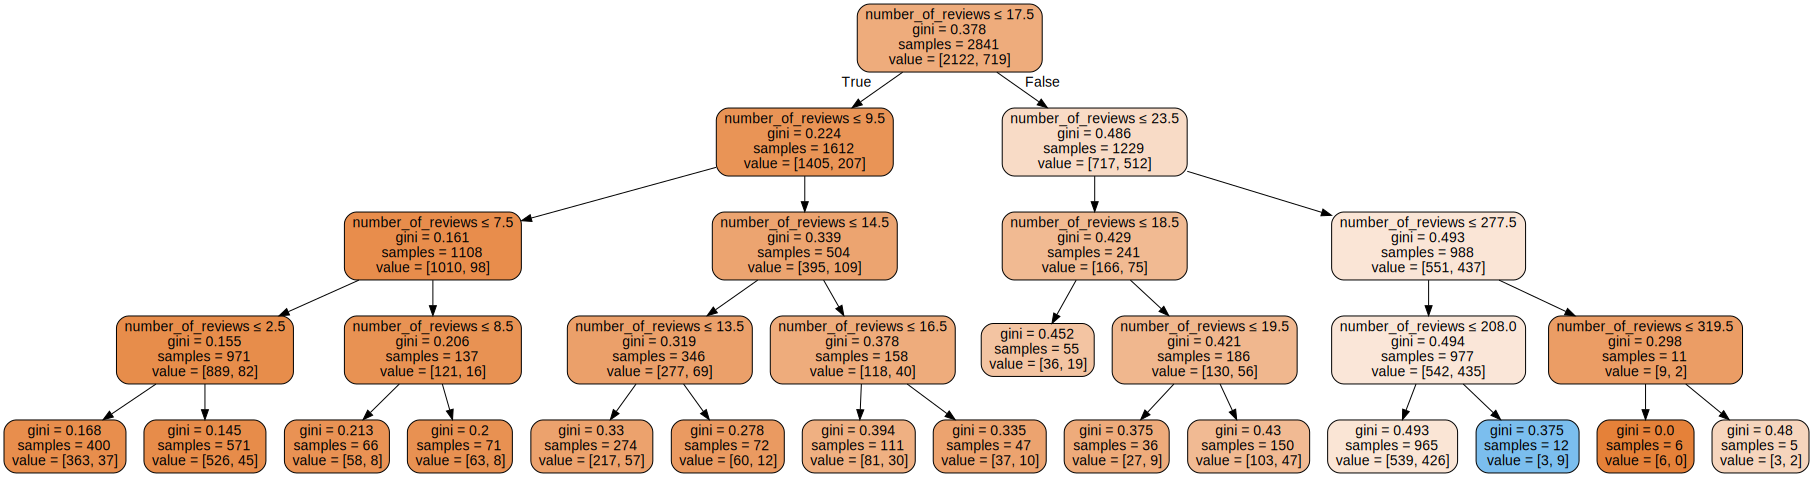

In [149]:
dectree = DecisionTreeClassifier(max_depth=4)

noReviews_train = pd.DataFrame(newMainDF['number_of_reviews'])
superhost_train = pd.DataFrame(superhostE)
dectree.fit(noReviews_train, superhost_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = noReviews_train.columns,         # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript


graphviz.Source(treedot)

#### Classification for review scored rating:

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7693116132422491

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7633262260127932



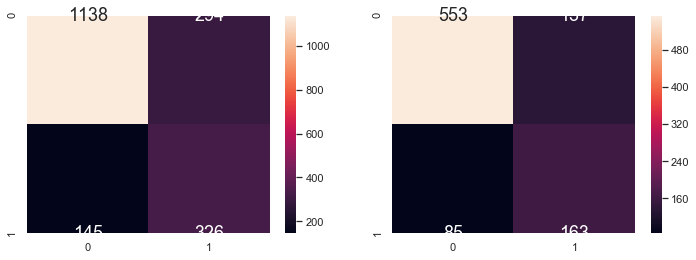

In [150]:
p2('review_scores_rating')

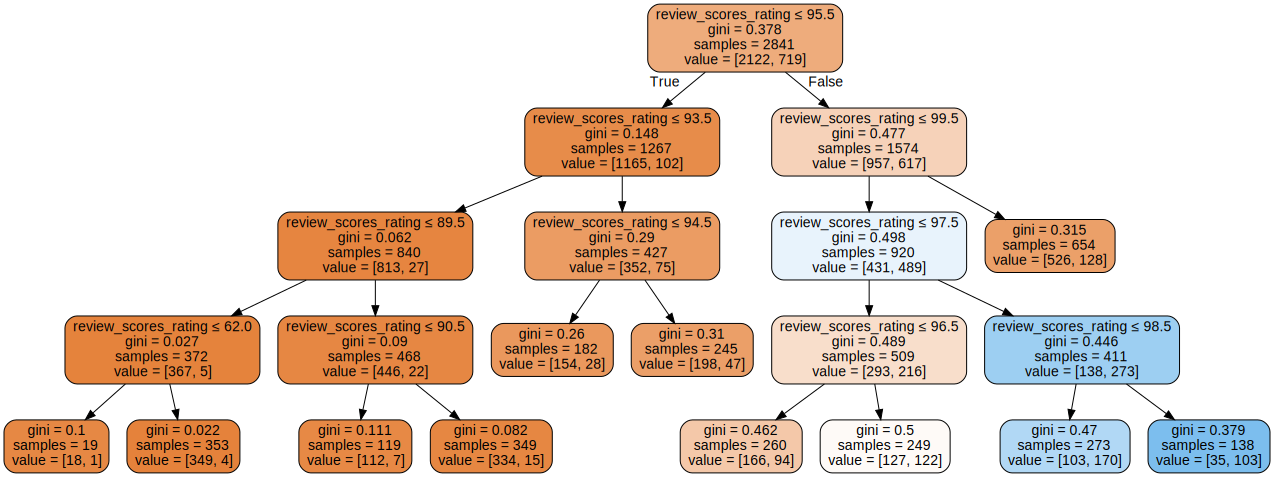

In [151]:
dectree = DecisionTreeClassifier(max_depth=4)

reviewScores_train = pd.DataFrame(newMainDF['review_scores_rating'])
superhost_train = pd.DataFrame(superhostE)
dectree.fit(reviewScores_train, superhost_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = reviewScores_train.columns,         # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript


graphviz.Source(treedot)

#### Classification for price:

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7477666841828692

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7452025586353944



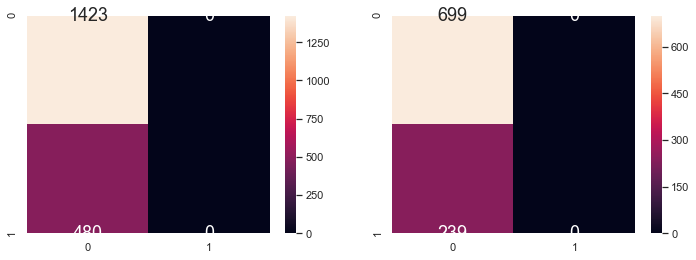

In [152]:
p2('price')

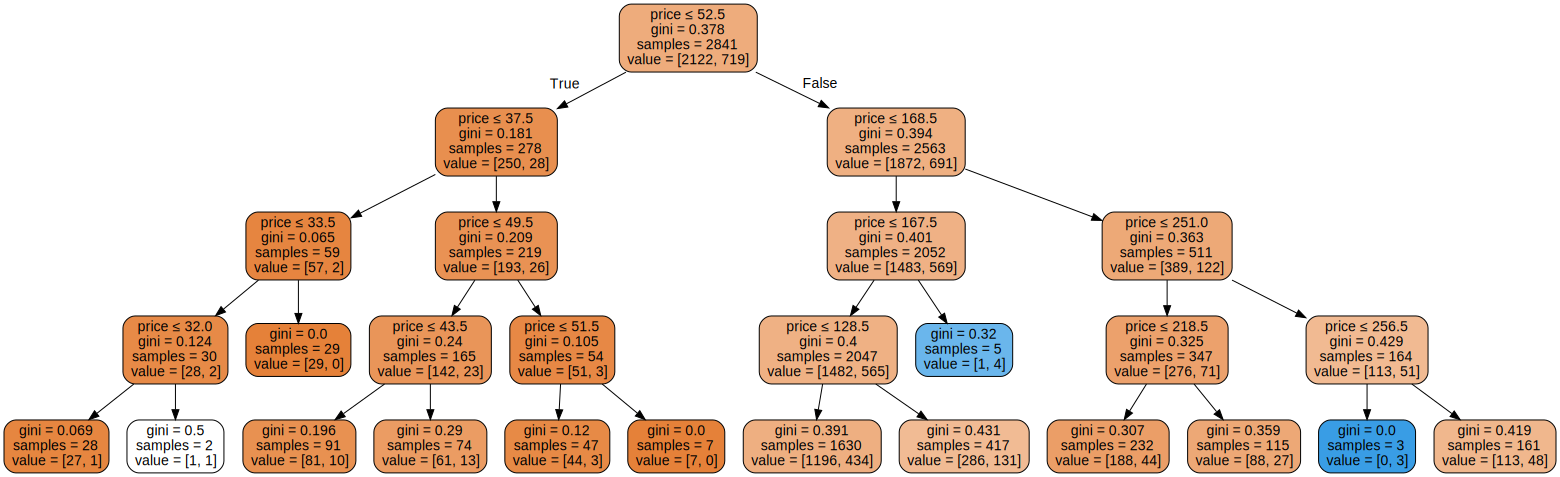

In [153]:
dectree = DecisionTreeClassifier(max_depth=4)

reviewScores_train = pd.DataFrame(newMainDF['price'])
superhost_train = pd.DataFrame(superhostE)
dectree.fit(reviewScores_train, superhost_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = reviewScores_train.columns,         # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript


graphviz.Source(treedot)

#### Classification for host listings count:

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7603783499737257

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7633262260127932



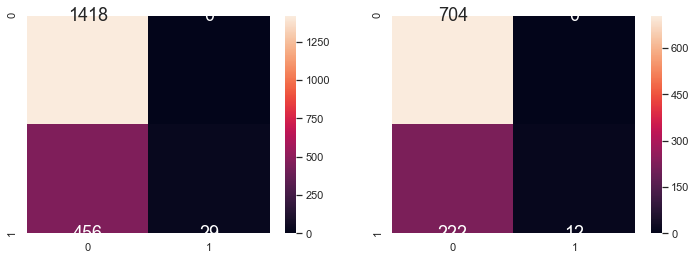

In [154]:
p2('host_listings_count')

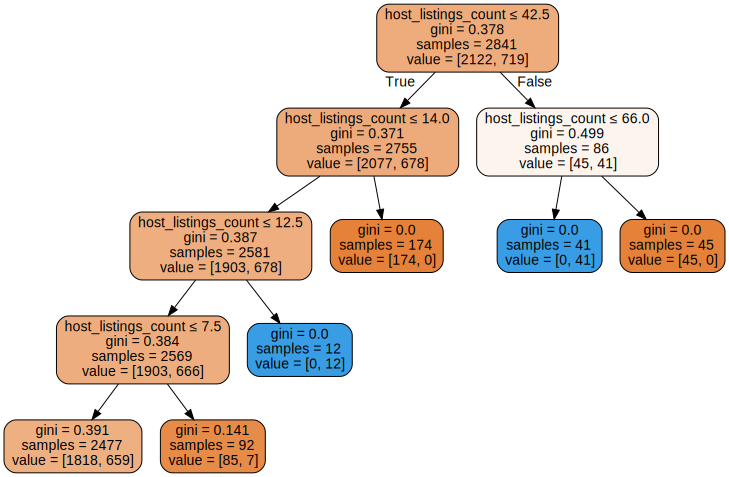

In [155]:
dectree = DecisionTreeClassifier(max_depth=4)

listCount_train = pd.DataFrame(newMainDF['host_listings_count'])
superhost_train = pd.DataFrame(superhostE)
dectree.fit(listCount_train, superhost_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = listCount_train.columns,         # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript


graphviz.Source(treedot)

#### Classification for host response rate:

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.743562795585917

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.753731343283582



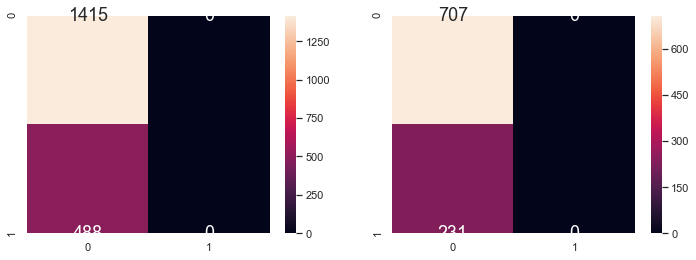

In [156]:
p2('host_response_rate')

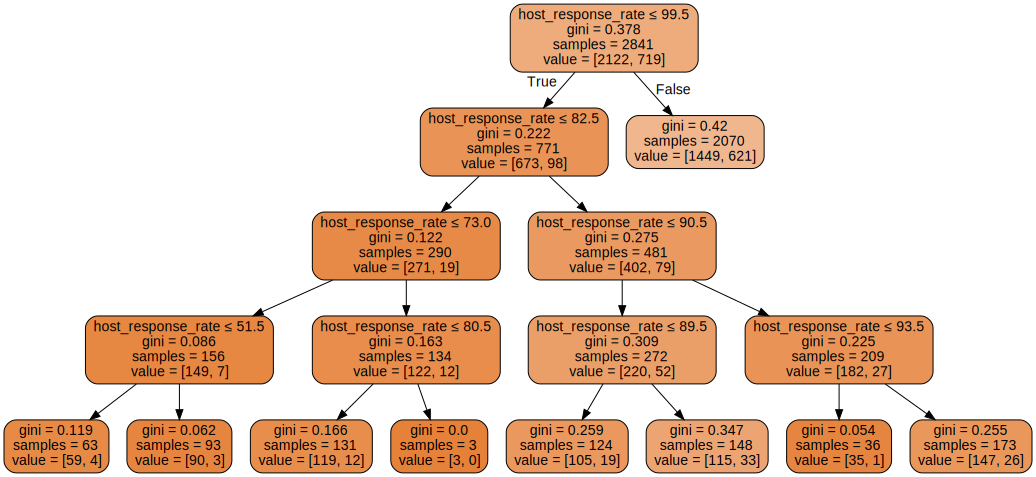

In [157]:
dectree = DecisionTreeClassifier(max_depth=4)

resRate_train = pd.DataFrame(newMainDF['host_response_rate'])
superhost_train = pd.DataFrame(superhostE)
dectree.fit(resRate_train, superhost_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = resRate_train.columns,         # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript


graphviz.Source(treedot)

##   

#### Multivariate classifcation:

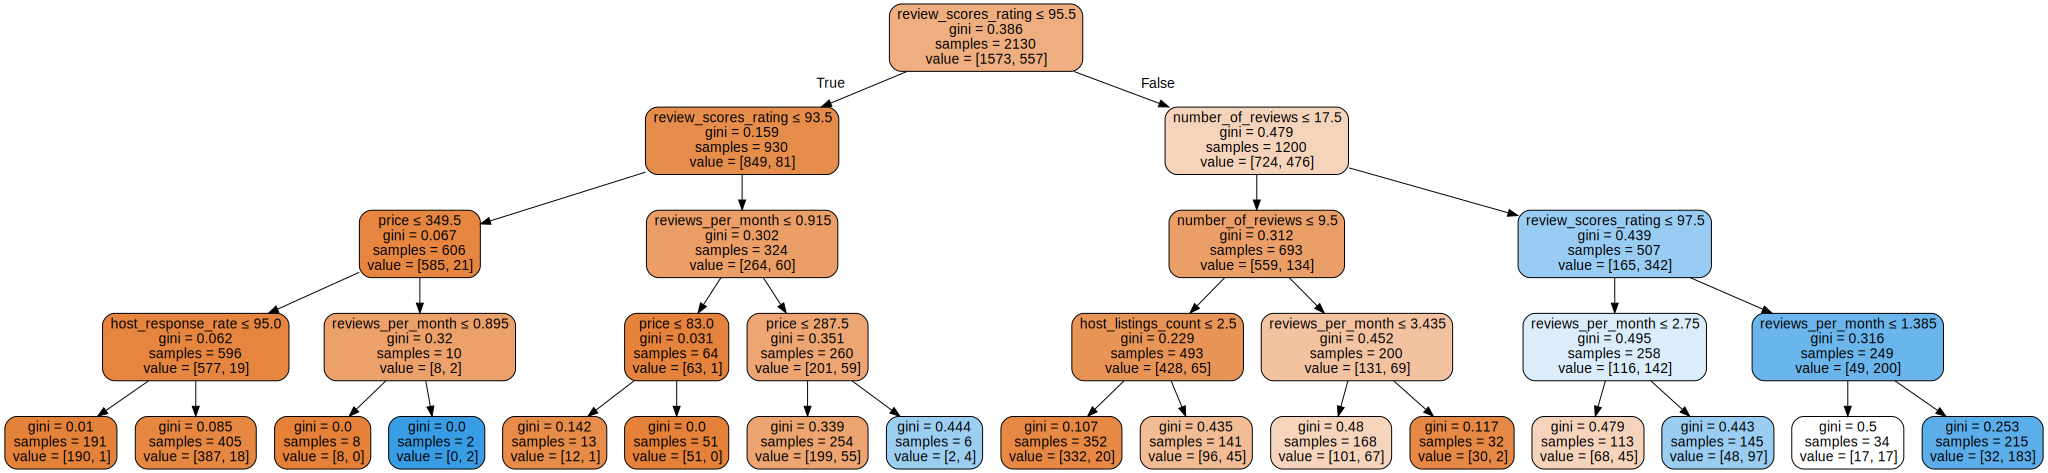

In [158]:
# Nultivariate classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
b = pd.DataFrame(superhostE)
v = pd.DataFrame(newMainDF[["review_scores_rating", "number_of_reviews", "reviews_per_month", "price", "host_listings_count","host_response_rate"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(v, b)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train) 

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)


# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8342723004694835

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8481012658227848



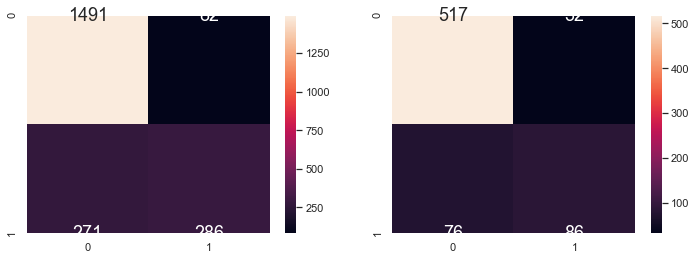

In [159]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [160]:
TN,FP,FN,TP = confusion_matrix(y_test,y_test_pred).ravel()

print("True Positive Rate: ",TP/(TP+FN))
print("True Negative Rate: ",TN/(TN+FP))
print("False Positive Rate: ",FP/(TN+FP))
print("False Negative Rate: ",FN/(TP+FN))

#calculating the TP,TN,FP,FN to predict the status

True Positive Rate:  0.5308641975308642
True Negative Rate:  0.941712204007286
False Positive Rate:  0.058287795992714025
False Negative Rate:  0.4691358024691358


#### Predict Supehost using the tree model above on both Train and Test data

In [161]:
trainPrediction = dectree.predict(X_train)
trainPrediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [162]:
trainPrediction = pd.DataFrame(trainPrediction, columns = ["predictedSuperhost"], index = X_train.index)
predictedFrame = pd.concat([X_train,y_train, trainPrediction], axis = 1)

predictedFrame

review_scores_rating  number_of_reviews  reviews_per_month  price  \
1805                   100                 10               2.56   55.0   
695                    100                  1               0.58  115.0   
2572                    98                 13               0.42  250.0   
261                     80                  1               0.29   40.0   
912                    100                  1               0.81   50.0   
...                    ...                ...                ...    ...   
1829                   100                  4               0.59  100.0   
89                      96                 15               1.22  224.0   
971                    100                  2               0.76  170.0   
1877                    91                 13               1.95  105.0   
1927                    93                 48               1.84   95.0   

      host_listings_count  host_response_rate  host_is_superhost  \
1805                  1.0               100.0                  0   
695                   1.0               100.0                  0   
2572                  1.0               100.0                  0   
261                  37.0                90.0                  0   
912                   1.0                83.0                  0   
...                   ...                 ...                ...   
1829                  2.0               100.0                  1   
89                    1.0               100.0                  1   
971                   1.0                56.0                  0   
1877                  1.0                67.0                  0   
1927                  1.0               100.0                  0   

      predictedSuperhost  
1805                   0  
695                    0  
2572                   0  
261                    0  
912                    0  
...                  ...  
1829                   0  
89                     0  
971                    0  
1877                   0  
1927                   0  

[2130 rows x 8 columns]

In [163]:
predictedFrame[(predictedFrame.host_is_superhost == 0) & (predictedFrame.predictedSuperhost == 1)]

review_scores_rating  number_of_reviews  reviews_per_month  price  \
2164                    96                 51               4.83  120.0   
128                     96                 28               3.40  180.0   
1562                    96                 57               3.44   42.0   
72                      96                 23               3.75  375.0   
1693                    96                 80               4.69  100.0   
...                    ...                ...                ...    ...   
195                     98                 59               3.45  120.0   
1986                    96                 24               2.93  103.0   
1635                    96                297               4.21   48.0   
2111                   100                 18               3.78   69.0   
1971                    97                 19               6.71  139.0   

      host_listings_count  host_response_rate  host_is_superhost  \
2164                  1.0               100.0                  0   
128                   1.0               100.0                  0   
1562                  3.0               100.0                  0   
72                    2.0               100.0                  0   
1693                  1.0               100.0                  0   
...                   ...                 ...                ...   
195                   1.0               100.0                  0   
1986                  1.0               100.0                  0   
1635                  1.0               100.0                  0   
2111                  1.0               100.0                  0   
1971                  2.0               100.0                  0   

      predictedSuperhost  
2164                   1  
128                    1  
1562                   1  
72                     1  
1693                   1  
...                  ...  
195                    1  
1986                   1  
1635                   1  
2111                   1  
1971                   1  

[82 rows x 8 columns]

In [164]:
predictedFrame[(predictedFrame.host_is_superhost == 1) & (predictedFrame.predictedSuperhost == 0)]

review_scores_rating  number_of_reviews  reviews_per_month  price  \
122                     97                131               2.59  120.0   
475                    100                  4               1.01  150.0   
1213                    93                 55               1.84   80.0   
2003                   100                  5               0.10   99.0   
1508                    94                 31               4.41   56.0   
...                    ...                ...                ...    ...   
1747                   100                  1               0.21  150.0   
1269                    96                 16               2.39  209.0   
954                     97                 14               1.07  155.0   
1829                   100                  4               0.59  100.0   
89                      96                 15               1.22  224.0   

      host_listings_count  host_response_rate  host_is_superhost  \
122                   1.0               100.0                  1   
475                  10.0                96.0                  1   
1213                  1.0               100.0                  1   
2003                  4.0               100.0                  1   
1508                  1.0               100.0                  1   
...                   ...                 ...                ...   
1747                 13.0               100.0                  1   
1269                 48.0               100.0                  1   
954                   5.0               100.0                  1   
1829                  2.0               100.0                  1   
89                    1.0               100.0                  1   

      predictedSuperhost  
122                    0  
475                    0  
1213                   0  
2003                   0  
1508                   0  
...                  ...  
1747                   0  
1269                   0  
954                    0  
1829                   0  
89                     0  

[271 rows x 8 columns]

In [165]:
testPrediction = dectree.predict(X_test)
testPrediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [166]:
testPrediction = pd.DataFrame(testPrediction, columns = ["predictedSuperhost"], index = X_test.index)
predictedFrame_test = pd.concat([X_test, y_test, testPrediction], axis = 1)

predictedFrame_test

review_scores_rating  number_of_reviews  reviews_per_month  price  \
1029                    80                  1               0.20  270.0   
2324                    96                 42               2.47   62.0   
2773                    96                 36               2.61  125.0   
1054                   100                  1               0.19  239.0   
2201                    95                 46               2.05  125.0   
...                    ...                ...                ...    ...   
1682                    96                151               3.55   75.0   
2171                    94                 87               3.27   99.0   
1573                    91                  8               1.07   70.0   
2667                   100                 14               2.37  250.0   
798                     98                 61               3.83   69.0   

      host_listings_count  host_response_rate  host_is_superhost  \
1029                 10.0                64.0                  0   
2324                  2.0               100.0                  0   
2773                  1.0               100.0                  0   
1054                 36.0                88.0                  0   
2201                  1.0               100.0                  0   
...                   ...                 ...                ...   
1682                  1.0               100.0                  0   
2171                  1.0               100.0                  1   
1573                  2.0               100.0                  0   
2667                 10.0                96.0                  1   
798                   2.0               100.0                  1   

      predictedSuperhost  
1029                   0  
2324                   0  
2773                   0  
1054                   0  
2201                   0  
...                  ...  
1682                   1  
2171                   0  
1573                   0  
2667                   0  
798                    1  

[711 rows x 8 columns]

In [167]:
predictedFrame_test[(predictedFrame_test.host_is_superhost == 0) & (predictedFrame_test.predictedSuperhost == 1)]

review_scores_rating  number_of_reviews  reviews_per_month  price  \
1422                    96                 27               5.83   79.0   
587                     97                 34               5.80   92.0   
617                     98                 25               1.94  157.0   
11                      98                 18               2.65  461.0   
650                     98                164               6.10  124.0   
2150                    96                158               5.25   80.0   
485                     98                 88               4.63   85.0   
1372                    98                105               4.87   99.0   
368                     98                 25               7.50   85.0   
825                     97                 31               7.32  100.0   
1578                    87                 81               1.95  399.0   
1962                    94                 19               2.37  550.0   
2413                    97                 23               5.75   75.0   
1437                    98                 20               6.98   65.0   
1814                    96                 36               3.35   49.0   
1443                    98                 18               2.34   56.0   
2311                    96                 38               5.11   69.0   
2801                    96                 35               3.14   99.0   
1139                    98                 18               4.95  110.0   
2808                    96                 57               7.60  120.0   
1470                    99                 18               6.92   85.0   
640                     97                 70               3.64   55.0   
1905                    85                  4               1.20  525.0   
1151                    96                 20               7.79  188.0   
365                     98                 63               3.18  110.0   
1797                    96                 60               6.14   65.0   
1155                    96                 74               3.77  135.0   
833                     98                 20               3.03   95.0   
1171                   100                 29               5.27  168.0   
1910                    95                 38               1.91  380.0   
1333                    94                 19               2.47  325.0   
1682                    96                151               3.55   75.0   

      host_listings_count  host_response_rate  host_is_superhost  \
1422                  1.0               100.0                  0   
587                   2.0                93.0                  0   
617                   1.0               100.0                  0   
11                    1.0               100.0                  0   
650                   1.0               100.0                  0   
2150                  2.0               100.0                  0   
485                   1.0               100.0                  0   
1372                  2.0               100.0                  0   
368                   1.0               100.0                  0   
825                   3.0               100.0                  0   
1578                 11.0                89.0                  0   
1962                  2.0               100.0                  0   
2413                  1.0               100.0                  0   
1437                  3.0               100.0                  0   
1814                  1.0               100.0                  0   
1443                  4.0               100.0                  0   
2311                  1.0               100.0                  0   
2801                  1.0                67.0                  0   
1139                  5.0               100.0                  0   
2808                  1.0               100.0                  0   
1470                  1.0               100.0                  0   
640                   4.0         

In [168]:
predictedFrame_test[(predictedFrame_test.host_is_superhost == 1) & (predictedFrame_test.predictedSuperhost == 0)]

review_scores_rating  number_of_reviews  reviews_per_month  price  \
2144                    96                  5               0.90  198.0   
2079                    96                 48               1.96  167.0   
1945                    95                 19               3.15  110.0   
1325                   100                  4               1.40  119.0   
1507                    97                 21               2.68  120.0   
...                    ...                ...                ...    ...   
2569                   100                  7               1.65   70.0   
633                     96                  5               0.97  130.0   
1885                    98                 16               2.53   85.0   
2171                    94                 87               3.27   99.0   
2667                   100                 14               2.37  250.0   

      host_listings_count  host_response_rate  host_is_superhost  \
2144                 13.0               100.0                  1   
2079                 48.0               100.0                  1   
1945                  3.0               100.0                  1   
1325                  1.0               100.0                  1   
1507                  1.0               100.0                  1   
...                   ...                 ...                ...   
2569                  2.0               100.0                  1   
633                   4.0                83.0                  1   
1885                  1.0               100.0                  1   
2171                  1.0               100.0                  1   
2667                 10.0                96.0                  1   

      predictedSuperhost  
2144                   0  
2079                   0  
1945                   0  
1325                   0  
1507                   0  
...                  ...  
2569                   0  
633                    0  
1885                   0  
2171                   0  
2667                   0  

[76 rows x 8 columns]

In [169]:
randomDataset = pd.DataFrame(newMainDF[['review_scores_rating', 'number_of_reviews', 'reviews_per_month','price','host_listings_count','host_response_rate']])
               

randomDataset_dataFrame = pd.DataFrame(randomDataset)
randomDataset_dataFrame

review_scores_rating  number_of_reviews  reviews_per_month  price  \
0                       95                207               4.07   85.0   
1                       96                 43               1.48  150.0   
2                       97                 20               1.15  975.0   
3                       92                 38               0.89  450.0   
4                       99                 58               2.46   80.0   
...                    ...                ...                ...    ...   
2836                    92                  5               1.56  154.0   
2837                   100                  2               0.63   65.0   
2838                    96                 73               4.01   95.0   
2839                    80                  1               0.30  359.0   
2840                   100                  2               2.00   79.0   

      host_listings_count  host_response_rate  
0                     3.0                96.0  
1                     6.0                98.0  
2                     2.0                67.0  
3                     2.0               100.0  
4                     1.0               100.0  
...                   ...                 ...  
2836                  1.0               100.0  
2837                  1.0               100.0  
2838                  3.0               100.0  
2839                354.0                99.0  
2840                  1.0               100.0  

[2841 rows x 6 columns]

In [170]:
train_predicttion = dectree.predict(randomDataset_dataFrame)
train_predicttion

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [171]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [172]:
train_predicttion = pd.DataFrame(train_predicttion, columns=["predictedSuperhost"], index = randomDataset_dataFrame.index)

catPred = pd.concat([randomDataset_dataFrame, train_predicttion], axis = 1)

print (catPred)

      review_scores_rating  number_of_reviews  reviews_per_month  price  \
0                       95                207               4.07   85.0   
1                       96                 43               1.48  150.0   
2                       97                 20               1.15  975.0   
3                       92                 38               0.89  450.0   
4                       99                 58               2.46   80.0   
5                       97                173               4.73   60.0   
6                       97                 32               1.55  150.0   
7                       97                181               3.33   95.0   
8                       97                  8               0.98   99.0   
9                       98                 13               0.92  245.0   
10                     100                  3               3.00  165.0   
11                      98                 18               2.65  461.0   
12                      8

2840                  1.0               100.0                   0  


#### Predict the category of host_is_superhost(1/0) using the above

In [173]:
catPred['host_is_superhost']=superhostE
catPred['predictedSuperhost']=train_predicttion['predictedSuperhost']


In [174]:
catPred

review_scores_rating  number_of_reviews  reviews_per_month  price  \
0                       95                207               4.07   85.0   
1                       96                 43               1.48  150.0   
2                       97                 20               1.15  975.0   
3                       92                 38               0.89  450.0   
4                       99                 58               2.46   80.0   
5                       97                173               4.73   60.0   
6                       97                 32               1.55  150.0   
7                       97                181               3.33   95.0   
8                       97                  8               0.98   99.0   
9                       98                 13               0.92  245.0   
10                     100                  3               3.00  165.0   
11                      98                 18               2.65  461.0   
12                      80                  1               0.73  109.0   
13                      95                 84               4.55   66.0   
14                      98                 45               4.58   99.0   
15                     100                  1               1.00  110.0   
16                      84                 11               0.71   99.0   
17                     100                  1               0.86  450.0   
18                     100                  8               1.30  450.0   
19                      95                 80               4.38   45.0   
20                     100                  6               2.47  300.0   
21                      85                  4               0.33   80.0   
22                      96                 38               1.86  175.0   
23                      92                 68               2.18  325.0   
24                      88                  8               1.31  175.0   
25                      75                  5               0.99  222.0   
26                      97                 62               2.27  159.0   
27                      95                 19               4.35  125.0   
28                      96                  5               0.97  348.0   
29                      97                  7               0.90   45.0   
30                     100                  2               0.83  150.0   
31                      98                 11               1.98   80.0   
32                      90                 71               4.70  110.0   
33                      91                  9               0.46  148.0   
34                      98                 18               3.35  150.0   
35                     100                  9               1.99  150.0   
36                      92                 20               2.29  100.0   
37                     100                  3               1.06  110.0   
38                      95                 26               0.80  130.0   
39                     100                  2               2.00   99.0   
40                      94                 44               5.64  145.0   
41                     100                 10               2.50   80.0   
42                      98                 77               4.12   95.0   
43                     100                  2               1.30   85.0   
44                      97                109               5.24   90.0   
45                      92                 52               7.06   80.0   
46                      97                191               4.96   60.0   
47                      91                  9               1.82  170.0   
48                      98                 65               3.94   85.0   
49                      96                  5               1.38  465.0   
50                      96                  5               1.01  175.0   
51                      93                 16               3.29   59.0   
52                      77     

***    

# Conclusion  <a class="anchor" id="conclusion"></a>

All in all, we managed to solve the main problem of helping AirBnb hosts maximise their revenue. With all the machine learning techniques that we have done, we can apply them in a website or maybe even in the AirBnb website itself to guide the hosts on how to earn more revenue with their listings. The hosts will have the option to see which of the areas that need improvement (e.g. more beds, how many people can the listing accomodate), or even when to mark up their price (e.g. during the holiday seasons). An area of improvement will be actually creating a dynamic website to implement all these machine learning techniques so that hosts will be able to know why their listing isn't doing as well compared to others.

***

# Contributions  <a class="anchor" id="contributions"></a>
<ul><li>Chocka: Time series Analysis to forecast Airbnb Prices and debugging</li>
    <li>Ting Qi: Debugging and Machine Learning for Superhost</li>
    <li>Jaryl: Encoding of amenities and Linear Regression</li>
    <li>Nazhura: Additional regression methods, neural network and Superhost prediction</li>

***

# References  <a class="anchor" id="references"></a>
Our project wouldn't be possible without the help from these sources:
<ul><li> https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/</li>
<li>https://github.com/L-Lewis/Airbnb-neural-network-price-prediction/blob/master/Airbnb-price-prediction.ipynb</li>
    <li>https://github.com/sinemypolat/predicting-airbnb-prices/blob/master/Project%201%20-%20Airbnb%20London.ipynb</li>
    <li>https://github.com/vivienfay/Airbnb-Seattle-Rental-Price-Prediction/blob/master/Airbnb_price_prediction.ipynb</li>
    <li>And of course, our example classes. Thank you Dr. Sourav! :-)</li>
</ul>

***